#Import Statement


In [8]:
pip install pandas openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 1.9 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 3.9 MB/s eta 0:00:0000:0100:01
  Using cached tenacity-8.2.3-py3-none-any.whl (24 kB)

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly as pt
import plotly.express as px
import plotly.graph_objs as go
from scipy.stats import chi2_contingency
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Data Understanding
---
> Data Collection.  
Historical Sales and Customers Data provided by our collaborator at https://caniricahearthandhome.aliexpress.com/store/5527068

Our collaborator separately provided us the data for 2021 and 2022.
In this section, we organize the data structure and order and get a brief look at the structure and index of 2021 and 2022 data.

# Read the Data


In [60]:
#For Grace to read data
df_2021 = pd.read_excel('/Users/tszeyenthen/Python Study/jupyter notebbok/WQD7007/4店2021销售数据.xlsx')
df_2022 = pd.read_excel('/Users/tszeyenthen/Python Study/jupyter notebbok/WQD7007/4店2022销售数据.xlsx')

In [34]:
#2021 data
df_2021.head()



,订单号,订单状态,负责人（业务员）,买家名称,下单时间,付款时间,产品总金额,物流费用,预计增值税,平台是否代征代缴,...,城市,地址,邮编,联系电话,手机,买家选择物流,发货期限,实际发货单号,发货时间,确认收货时间
0,3014891541207868,交易完成,null null,Berta Espinosa,2021-12-31 07:59,2021-12-31 07:59,US $4.26,US $0.00,US $0.74,平台已税,...,Madrid,****,28042,+34,****,AliExpress Saver Shipping\n,2022-01-05 07:59,AliExpress Saver Shipping:CNES00604083459\n,2022-01-03 23:47\n,2022-01-20 12:02
1,5016008238729820,交易完成,null null,Arina Zueva,2021-12-31 06:31,2021-12-31 06:31,US $20.88,US $3.96,NaN,NaN,...,Moscow,****,121359,7,****,AliExpress Saver Shipping\nAliExpress Standard...,2022-01-10 06:31,AliExpress Standard Shipping:LC939172363CN\n,2022-01-09 17:35\n,2022-01-25 06:37
2,3014890103437774,交易完成,null null,Robert Zaragoza,2021-12-31 05:43,2021-12-31 05:43,US $3.86,US $0.00,US $0.66,平台已税,...,Elche,****,03203,+34,****,AliExpress Saver Shipping\n,2022-01-06 05:43,AliExpress Saver Shipping:UX7MCM04482351301032...,2022-01-03 23:47\n,2022-01-13 22:40
3,3015083672992903,交易完成,null null,rakel pinhas,2021-12-31 05:41,2021-12-31 05:41,US $3.67,US $0.13,NaN,NaN,...,Batyam,****,5963140,+972,****,Cainiao Super Economy Global\n,2022-01-06 05:41,Cainiao Super Economy Global:UZ0227768006Y\n,2022-01-03 23:59\n,2022-01-30 09:01
4,3014986682225810,交易完成,null null,IL shopper,2021-12-31 05:19,2021-12-31 05:19,US $3.98,US $0.13,NaN,NaN,...,Nahariya,****,2221011,+972,****,Cainiao Super Economy Global\n,2022-01-05 05:19,Cainiao Super Economy Global:UZ0227750766Y\n,2022-01-03 23:59\n,2022-01-25 08:06


The first five rows and last five rows of the data for 2021 shows that it is arranged in descending order of the date.
This needs to be fixed.

In [35]:
df_2022.head()

,订单号,订单状态,负责人（业务员）,买家名称,下单时间,付款时间,产品总金额,物流费用,预计增值税,平台是否代征代缴,...,城市,地址,邮编,联系电话,手机,买家选择物流,发货期限,实际发货单号,发货时间,确认收货时间
0,8144235027391309,交易完成,null null,shinnyryan s,2021-12-31 08:11,2021-12-31 08:11,US $8.66,US $2.81,US $2.14,平台已税,...,Wicklow,****,A67 HN60,+353,****,AliExpress Standard Shipping\n,2022-01-05 08:11,AliExpress Standard Shipping:CP121740416IE\n,2022-01-03 22:53\n,2022-01-24 04:02
1,3014906572987868,交易完成,null null,Berta Espinosa,2021-12-31 08:21,2021-12-31 08:21,US $5.50,US $0.00,US $0.95,平台已税,...,Madrid,****,28042,+34,****,AliExpress Saver Shipping\n,2022-01-05 08:21,AliExpress Saver Shipping:CNES00604083832\n,2022-01-03 23:47\n,2022-01-22 06:01
2,3014969828897747,交易完成,null null,christian Malfoy,2021-12-31 09:11,2021-12-31 09:11,US $11.94,US $0.00,US $1.99,平台已税,...,Abbeville,****,80100,+33,****,AliExpress Saver Shipping\n,2022-01-06 09:11,AliExpress Saver Shipping:C8001631735280100\n,2022-01-03 23:47\n,2022-01-12 11:10
3,8143953768737296,交易完成,null null,Fagon Celine,2021-12-31 10:09,2021-12-31 10:09,US $8.14,US $0.00,US $1.36,平台已税,...,PARIS 13E ARRONDISSEMENT,****,75013,+0033,****,AliExpress Saver Shipping\n,2022-01-05 10:09,AliExpress Saver Shipping:SD000211359FR\n,2022-01-03 23:47\n,2022-01-14 07:27
4,8144305172091043,交易完成,null null,Sandra Santibanez,2021-12-31 10:53,2021-12-31 10:53,US $13.22,US $2.29,NaN,NaN,...,santiago centro,****,8320148,+56,****,AliExpress Saver Shipping\n,2022-01-06 10:53,AliExpress Standard Shipping:12883201487000242...,2022-01-03 22:53\n,2022-01-19 10:38


The code below shows that we combined data from 2021 and 2022 and displayed the first five and last five rows of the concatenated dataframe.

In [61]:
df = pd.concat([df_2021, df_2022], axis=0)
df

,订单号,订单状态,负责人（业务员）,买家名称,下单时间,付款时间,产品总金额,物流费用,预计增值税,平台是否代征代缴,...,城市,地址,邮编,联系电话,手机,买家选择物流,发货期限,实际发货单号,发货时间,确认收货时间
0,3014891541207868,交易完成,null null,Berta Espinosa,2021-12-31 07:59,2021-12-31 07:59,US $4.26,US $0.00,US $0.74,平台已税,...,Madrid,****,28042,+34,****,AliExpress Saver Shipping\n,2022-01-05 07:59,AliExpress Saver Shipping:CNES00604083459\n,2022-01-03 23:47\n,2022-01-20 12:02
1,5016008238729820,交易完成,null null,Arina Zueva,2021-12-31 06:31,2021-12-31 06:31,US $20.88,US $3.96,NaN,NaN,...,Moscow,****,121359,7,****,AliExpress Saver Shipping\nAliExpress Standard...,2022-01-10 06:31,AliExpress Standard Shipping:LC939172363CN\n,2022-01-09 17:35\n,2022-01-25 06:37
2,3014890103437774,交易完成,null null,Robert Zaragoza,2021-12-31 05:43,2021-12-31 05:43,US $3.86,US $0.00,US $0.66,平台已税,...,Elche,****,03203,+34,****,AliExpress Saver Shipping\n,2022-01-06 05:43,AliExpress Saver Shipping:UX7MCM04482351301032...,2022-01-03 23:47\n,2022-01-13 22:40
3,3015083672992903,交易完成,null null,rakel pinhas,2021-12-31 05:41,2021-12-31 05:41,US $3.67,US $0.13,NaN,NaN,...,Batyam,****,5963140,+972,****,Cainiao Super Economy Global\n,2022-01-06 05:41,Cainiao Super Economy Global:UZ0227768006Y\n,2022-01-03 23:59\n,2022-01-30 09:01
4,3014986682225810,交易完成,null null,IL shopper,2021-12-31 05:19,2021-12-31 05:19,US $3.98,US $0.13,NaN,NaN,...,Nahariya,****,2221011,+972,****,Cainiao Super Economy Global\n,2022-01-05 05:19,Cainiao Super Economy Global:UZ0227750766Y\n,2022-01-03 23:59\n,2022-01-25 08:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14866,8160373500431159,等待买家收货,null null,Paulina Andrzejewska,2022-12-31 04:01,2022-12-31 04:01,US $10.02,US $1.72,NaN,NaN,...,West Midlands,****,B692LZ,+44,****,AliExpress Standard Shipping\n,2023-01-06 04:01,AliExpress Standard Shipping:H02V3A0002134969\n,2023-01-02 23:12\n,NaN
14867,3020454919494912,订单关闭,null null,CELINE CASTAGNET,2022-12-31 04:54,2022-12-31 04:54,US $14.37,US $0.00,US $2.34,平台已税,...,Urt,****,64240,+33,****,AliExpress Saver Shipping\n,2023-01-10 04:54,NaN,NaN,NaN
14868,3020416848932364,等待买家收货,null null,david lopez,2022-12-31 06:19,2022-12-31 06:19,US $9.32,US $0.00,US $1.54,平台已税,...,Fuengirola,****,29640,+34,****,AliExpress Saver Shipping\n,2023-01-06 06:19,AliExpress Saver Shipping:CNES00617281795\n,2023-01-02 21:56\n,NaN
14869,3020333620597188,等待买家收货,null null,mandy van Alphen,2022-12-31 07:06,2022-12-31 07:06,US $8.60,US $0.00,US $1.46,平台已税,...,Den Haag,****,2523 JP,+31,****,AliExpress Saver Shipping\n,2023-01-06 07:06,AliExpress Saver Shipping:UT305857867NL\n,2023-01-02 21:56\n,NaN


Because we need to arrange the data by ascending order of dates, we first set the format of the data type to datetime and sort the data by date.

In [62]:
df['下单时间'] = pd.to_datetime(df['下单时间']).dt.strftime('%Y-%m-%d')
df['付款时间'] = pd.to_datetime(df['付款时间']).dt.strftime('%Y-%m-%d')

In [63]:
df['下单时间'] = pd.to_datetime(df['下单时间'], format='%Y-%m-%d')
type(df['下单时间'])
df['付款时间'] = pd.to_datetime(df['付款时间'], format='%Y-%m-%d')
type(df['付款时间'])

pandas.core.series.Series

In [64]:
#Arranged dataframe by ascending order of dates.
df.sort_values('下单时间', ascending=True, inplace=True)
df

,订单号,订单状态,负责人（业务员）,买家名称,下单时间,付款时间,产品总金额,物流费用,预计增值税,平台是否代征代缴,...,城市,地址,邮编,联系电话,手机,买家选择物流,发货期限,实际发货单号,发货时间,确认收货时间
21408,8123766126321133,订单关闭,null null,Salamat Qadri,2020-12-31,NaT,US $21.54,US $0.00,NaN,NaN,...,Bergamo,****,24050,+39,****,Cainiao Super Economy Global\n,2021-01-20 08:08,NaN,NaN,NaN
21388,3008228860048089,交易完成,null null,ayda parsa,2020-12-31,2020-12-31,US $10.26,US $1.09,NaN,NaN,...,Nurenberg,****,90478,+49,****,AliExpress Standard Shipping\n,2021-01-05 14:36,AliExpress Standard Shipping:CNCAI202101040956...,2021-01-03 21:43\n,2021-02-10 02:41
21387,8123872379406258,交易完成,null null,Ian Cardoso,2020-12-31,2020-12-31,US $17.60,US $3.00,NaN,NaN,...,Guarapari,****,29200750,55,****,Aliexpress Direct\n,2021-01-07 14:43,Aliexpress Direct:LB397970613SE\n,2021-01-07 08:21\n,2021-02-01 19:51
21386,8123873978362236,交易完成,null null,Hadassa Quirino,2020-12-31,2020-12-31,US $13.84,US $3.00,NaN,NaN,...,Recife,****,50070-000,+55,****,Aliexpress Direct\n,2021-01-07 15:17,Aliexpress Direct:LB397963507SE\n,2021-01-07 08:22\n,2021-01-27 03:17
21385,3008227898070936,订单关闭,null null,Laura Sanchez,2020-12-31,2020-12-31,US $24.28,US $1.81,NaN,NaN,...,Getafe,****,28901,+34,****,AliExpress Standard Shipping\n,2021-01-05 15:36,AliExpress Standard Shipping:PQ70EH04005855601...,2021-01-05 01:35\n,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14857,3020451185193826,等待买家收货,null null,Lea GRIMALDI,2022-12-31,2022-12-31,US $14.49,US $1.25,US $2.51,平台已税,...,Mondelange,****,57300,+33,****,AliExpress Saver Shipping\nAliExpress Standard...,2023-01-05 00:53,AliExpress Standard Shipping:LZ349683630FR\n,2023-01-02 23:11\n,NaN
14856,8160258206737897,等待买家收货,null null,Fanny Carayon,2022-12-31,2022-12-31,US $5.69,US $0.00,US $0.95,平台已税,...,MARSEILLE 7E ARRONDISSEMENT,****,13007,+33,****,AliExpress Saver Shipping\n,2023-01-06 00:11,AliExpress Saver Shipping:UZ582975645FR\n,2023-01-02 21:56\n,NaN
14869,3020333620597188,等待买家收货,null null,mandy van Alphen,2022-12-31,2022-12-31,US $8.60,US $0.00,US $1.46,平台已税,...,Den Haag,****,2523 JP,+31,****,AliExpress Saver Shipping\n,2023-01-06 07:06,AliExpress Saver Shipping:UT305857867NL\n,2023-01-02 21:56\n,NaN
14862,3020411800431028,等待买家收货,null null,יובל אסייג,2022-12-31,2022-12-31,US $16.64,US $3.93,NaN,NaN,...,Kfar Yona,****,4031653,+972,****,AliExpress Standard Shipping\n,2023-01-06 02:03,AliExpress Standard Shipping:AE010259432\n,2023-01-02 23:11\n,NaN


A first glance at the dataset structure:

In [65]:
print(df.shape)
print(df.columns)
df.tail()



(36280, 29)
Index(['订单号', '订单状态', '负责人（业务员）', '买家名称', '下单时间', '付款时间', '产品总金额', '物流费用',
       '预计增值税', '平台是否代征代缴', '订单金额', '店铺优惠', '商品信息', '商品编码', '订单备注', '收货地址',
       '收件人名称', '收货国家', '州/省', '城市', '地址', '邮编', '联系电话', '手机', '买家选择物流',
       '发货期限', '实际发货单号', '发货时间', '确认收货时间'],
      dtype='object')


,订单号,订单状态,负责人（业务员）,买家名称,下单时间,付款时间,产品总金额,物流费用,预计增值税,平台是否代征代缴,...,城市,地址,邮编,联系电话,手机,买家选择物流,发货期限,实际发货单号,发货时间,确认收货时间
14857,3020451185193826,等待买家收货,null null,Lea GRIMALDI,2022-12-31,2022-12-31,US $14.49,US $1.25,US $2.51,平台已税,...,Mondelange,****,57300,+33,****,AliExpress Saver Shipping\nAliExpress Standard...,2023-01-05 00:53,AliExpress Standard Shipping:LZ349683630FR\n,2023-01-02 23:11\n,NaN
14856,8160258206737897,等待买家收货,null null,Fanny Carayon,2022-12-31,2022-12-31,US $5.69,US $0.00,US $0.95,平台已税,...,MARSEILLE 7E ARRONDISSEMENT,****,13007,+33,****,AliExpress Saver Shipping\n,2023-01-06 00:11,AliExpress Saver Shipping:UZ582975645FR\n,2023-01-02 21:56\n,NaN
14869,3020333620597188,等待买家收货,null null,mandy van Alphen,2022-12-31,2022-12-31,US $8.60,US $0.00,US $1.46,平台已税,...,Den Haag,****,2523 JP,+31,****,AliExpress Saver Shipping\n,2023-01-06 07:06,AliExpress Saver Shipping:UT305857867NL\n,2023-01-02 21:56\n,NaN
14862,3020411800431028,等待买家收货,null null,יובל אסייג,2022-12-31,2022-12-31,US $16.64,US $3.93,NaN,NaN,...,Kfar Yona,****,4031653,+972,****,AliExpress Standard Shipping\n,2023-01-06 02:03,AliExpress Standard Shipping:AE010259432\n,2023-01-02 23:11\n,NaN
14870,8160519815045234,等待买家收货,null null,Patricia Deppe,2022-12-31,2022-12-31,US $4.20,US $0.14,NaN,NaN,...,Bern,****,3065,41,****,Cainiao Super Economy Global\n,2023-01-06 07:21,Cainiao Super Economy Global:S00000286551127\n,2023-01-02 21:26\n,NaN


# Data Preparation

We are interested in predicting the number of orders per day or per month, so we do not need the time component in the '下单时间' column and '付款时间' column.

Check if there are any duplicate orders in df and drop them.


In [66]:
#based on "订单号", "下单时间", "商品信息", "订单金额"
num_duplicates = df.duplicated(subset=['订单号', '下单时间', '商品信息','订单金额'], keep=False)
print(num_duplicates)
sum_num_duplicates = num_duplicates.sum()
print(f"Total duplicates: {sum_num_duplicates}")
#show_duplicates_orderno = df[df.duplicated(subset=['订单号', '下单时间', '商品信息','订单金额'], keep=False)]
#show_duplicates_orderno
#show_duplicates_orderno.to_csv("show_duplicates_orderno.csv")
### Total duplicates: 138
### Can let "下单时间" = "付款时间", they give same output

21408    False
21388    False
21387    False
21386    False
21385    False
         ...  
14857    False
14856    False
14869    False
14862    False
14870    False
Length: 36280, dtype: bool
Total duplicates: 138


In [67]:
#Drop duplicates
df.drop_duplicates(subset=['订单号', '下单时间', '商品信息','订单金额'], keep=False, inplace=True, ignore_index=False)
print(df.shape)

(36142, 29)


In [68]:
#Verify if duplicates were dropped
df.duplicated(subset=['订单号', '下单时间', '商品信息','订单金额'], keep=False).sum()

0

Double check all features for duplicates.

In [69]:
df.duplicated().any()
#No more duplicates

False

Check NAN/null values


In [38]:
df_null = df.isnull()
df_null

,订单号,订单状态,负责人（业务员）,买家名称,下单时间,付款时间,产品总金额,物流费用,预计增值税,平台是否代征代缴,...,城市,地址,邮编,联系电话,手机,买家选择物流,发货期限,实际发货单号,发货时间,确认收货时间
21408,False,False,False,False,False,True,False,False,True,True,...,False,False,False,False,False,False,False,True,True,True
21388,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
21387,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
21386,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
21385,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14857,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
14856,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
14869,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
14862,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,True


In [70]:
df_null_counts = df.isnull().sum()
print(df_null_counts)

订单号             0
订单状态            0
负责人（业务员）        0
买家名称            0
下单时间            0
付款时间         2415
产品总金额           0
物流费用            0
预计增值税       26131
平台是否代征代缴    26130
订单金额            0
店铺优惠            0
商品信息            0
商品编码          826
订单备注        34787
收货地址        36142
收件人名称           0
收货国家            0
州/省            10
城市              0
地址              0
邮编              4
联系电话          484
手机              0
买家选择物流          0
发货期限            1
实际发货单号       3364
发货时间         3364
确认收货时间       4879
dtype: int64


In [71]:
df_null_counts = df['付款时间'].isnull().sum()
df_null_counts

2415

In [72]:
df_null_counts = df[df['付款时间'].isnull()]
df_null_counts

,订单号,订单状态,负责人（业务员）,买家名称,下单时间,付款时间,产品总金额,物流费用,预计增值税,平台是否代征代缴,...,城市,地址,邮编,联系电话,手机,买家选择物流,发货期限,实际发货单号,发货时间,确认收货时间
21408,8123766126321133,订单关闭,null null,Salamat Qadri,2020-12-31,NaT,US $21.54,US $0.00,NaN,NaN,...,Bergamo,****,24050,+39,****,Cainiao Super Economy Global\n,2021-01-20 08:08,NaN,NaN,NaN
21383,3008151049945189,订单关闭,null null,ismail ouamarmoussa,2020-12-31,NaT,US $7.30,US $0.00,NaN,NaN,...,Benicarlo,****,12580,+34,****,AliExpress Saver Shipping\n,2021-01-20 15:40,NaN,NaN,NaN
21375,5007784450678684,订单关闭,null null,Olga Shevchuk,2020-12-31,NaT,US $7.38,US $1.33,NaN,NaN,...,Dalnegorsk,****,692441,+7,****,AliExpress Standard Shipping\n,2021-01-20 23:55,NaN,NaN,NaN
21360,3008228762024846,订单关闭,null null,Tessa Wolf,2021-01-01,NaT,US $9.76,US $1.49,NaN,NaN,...,Duiven,****,6921 JK,+31,****,AliExpress Standard Shipping\n,2021-01-13 05:57,NaN,NaN,NaN
21364,8123764434657916,订单关闭,null null,Mila Cantero,2021-01-01,NaT,US $19.32,US $2.20,NaN,NaN,...,Legazpi,****,20230,+34,****,AliExpress Standard Shipping\n,2021-01-21 04:35,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14760,8159901127346692,等待买家付款,null null,HR Shopper,2022-12-28,NaT,US $4.54,US $0.00,US $0.89,平台已税,...,Lupoglav istra,****,52426,385,****,Cainiao Super Economy\n,2023-01-17 05:46,NaN,NaN,NaN
14764,3020388117263329,订单关闭,null null,Mamalein Van Der Burg,2022-12-28,NaT,US $14.10,US $0.00,US $2.40,平台已税,...,Schiedam,****,3111kc,+31,****,AliExpress Saver Shipping\n,2023-01-09 06:30,NaN,NaN,NaN
14835,3020440111915691,等待买家付款,null null,lebrun anna,2022-12-30,NaT,US $4.17,US $0.00,US $0.66,平台已税,...,Courbevoie,****,92400,+33,****,AliExpress Saver Shipping\n,2023-01-11 09:09,NaN,NaN,NaN
14812,3020402778668364,等待买家付款,null null,Seham abo rgela,2022-12-30,NaT,US $3.23,US $0.14,NaN,NaN,...,Segev Shalom,****,8574000,+972,****,Cainiao Super Economy Global\n,2023-01-19 00:35,NaN,NaN,NaN


In [73]:
df_sale_failed = df_null_counts[df_null_counts["订单状态"] == "订单关闭"]
# df_sale_failed = df[(df['付款时间'].isnull()) & (df['订单状态'] == '订单关闭')]
print(f"Number of null: {df_sale_failed.shape[0]}")
df_sale_failed
#df_null_counts.to_csv("付款时间_null.csv")
#there are 5 rows have 发货时间 but without 确认收货时间, means the customer did pay

Number of null: 2401


,订单号,订单状态,负责人（业务员）,买家名称,下单时间,付款时间,产品总金额,物流费用,预计增值税,平台是否代征代缴,...,城市,地址,邮编,联系电话,手机,买家选择物流,发货期限,实际发货单号,发货时间,确认收货时间
21408,8123766126321133,订单关闭,null null,Salamat Qadri,2020-12-31,NaT,US $21.54,US $0.00,NaN,NaN,...,Bergamo,****,24050,+39,****,Cainiao Super Economy Global\n,2021-01-20 08:08,NaN,NaN,NaN
21383,3008151049945189,订单关闭,null null,ismail ouamarmoussa,2020-12-31,NaT,US $7.30,US $0.00,NaN,NaN,...,Benicarlo,****,12580,+34,****,AliExpress Saver Shipping\n,2021-01-20 15:40,NaN,NaN,NaN
21375,5007784450678684,订单关闭,null null,Olga Shevchuk,2020-12-31,NaT,US $7.38,US $1.33,NaN,NaN,...,Dalnegorsk,****,692441,+7,****,AliExpress Standard Shipping\n,2021-01-20 23:55,NaN,NaN,NaN
21360,3008228762024846,订单关闭,null null,Tessa Wolf,2021-01-01,NaT,US $9.76,US $1.49,NaN,NaN,...,Duiven,****,6921 JK,+31,****,AliExpress Standard Shipping\n,2021-01-13 05:57,NaN,NaN,NaN
21364,8123764434657916,订单关闭,null null,Mila Cantero,2021-01-01,NaT,US $19.32,US $2.20,NaN,NaN,...,Legazpi,****,20230,+34,****,AliExpress Standard Shipping\n,2021-01-21 04:35,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14686,8159889223631059,订单关闭,null null,yasmeen michael,2022-12-26,NaT,US $8.66,US $0.00,US $1.42,平台已税,...,Saint-jean-de-verges,****,09000,+33,****,AliExpress Saver Shipping\n,2023-01-07 10:04,NaN,NaN,NaN
14736,3020343019494586,订单关闭,null null,Naimasereen Elmaimouni,2022-12-27,NaT,US $5.80,US $0.00,US $0.99,平台已税,...,Roermond,****,6043 VN,+31,****,AliExpress Saver Shipping\n,2023-01-08 11:01,NaN,NaN,NaN
14711,8159912519136039,订单关闭,null null,US c,2022-12-27,NaT,US $4.12,US $0.93,US $0.85,平台已税,...,La garde,****,83130,+,****,AliExpress Standard Shipping\n,2023-01-08 00:50,NaN,NaN,NaN
14764,3020388117263329,订单关闭,null null,Mamalein Van Der Burg,2022-12-28,NaT,US $14.10,US $0.00,US $2.40,平台已税,...,Schiedam,****,3111kc,+31,****,AliExpress Saver Shipping\n,2023-01-09 06:30,NaN,NaN,NaN


In [74]:
null_orderclosed_withdeliverytime = df_null_counts[(df_null_counts["订单状态"] == "订单关闭") & (df_null_counts["发货时间"].notnull())]
null_orderclosed_withdeliverytime

,订单号,订单状态,负责人（业务员）,买家名称,下单时间,付款时间,产品总金额,物流费用,预计增值税,平台是否代征代缴,...,城市,地址,邮编,联系电话,手机,买家选择物流,发货期限,实际发货单号,发货时间,确认收货时间
21357,8123803880399339,订单关闭,null null,ae291377 user,2021-01-01,NaT,US $11.83,US $0.25,NaN,NaN,...,Dammam,****,Flowernjood,+966,****,Aliexpress Direct\n,2021-01-08 07:09,Aliexpress Direct:LP00427690716143\n,2021-01-08 01:58\n,NaN
17576,8126279068719583,订单关闭,null null,SA f,2021-02-18,NaT,US $4.49,US $1.20,NaN,NaN,...,Makkah,****,0586,+966,****,Aliexpress Direct\n,2021-03-01 08:53,Aliexpress Direct:LP00434388404040\n,2021-03-01 04:27\n,NaN
17345,8126551245824175,订单关闭,null null,SA shopper,2021-02-21,NaT,US $10.36,US $0.37,NaN,NaN,...,Bisha,****,1111,+966,****,Aliexpress Direct\n,2021-03-02 11:09,Aliexpress Direct:LP00434576270593\n,2021-03-02 05:41\n,NaN
11381,8132396785028523,订单关闭,null null,dalal alghamdi,2021-05-20,NaT,US $16.86,US $0.60,NaN,NaN,...,Riyadh,****,999088,+966,****,Aliexpress Direct\n,2021-05-31 11:36,Aliexpress Direct:LP00449441838563\n,2021-05-31 02:08\n,NaN
8669,8135351234311227,订单关闭,null null,ae691405 user,2021-07-13,NaT,US $15.99,US $1.00,NaN,NaN,...,Riyadh,****,13255,+966,****,Aliexpress Direct\n,2021-07-20 20:38,Aliexpress Direct:LP00458048859705\n,2021-07-16 06:02\n,NaN
7036,8137157795725262,订单关闭,null null,mahassaf3 user,2021-08-21,NaT,US $16.79,US $6.00,NaN,NaN,...,Riyadh,****,13317,+966,****,Aliexpress Direct\n,2021-08-27 06:44,Aliexpress Direct:LP00464992030771\n,2021-08-27 04:24\n,NaN


In [75]:
null_orderclosed_withdeliverytime.shape[0]

6

In [47]:
df_orderwait_null = df_null_counts[df_null_counts["订单状态"] == "等待买家付款"]
# df_orderwait_null = df[(df['付款时间'].isnull()) & (df['订单状态'] == '交易完成')]
print(f"Number of null: {df_orderwait_null.shape[0]}")
df_orderwait_null
#df_null_counts.to_csv("付款时间_null.csv")
#can remove this as no 发货，means the customers did not pay at all

Number of null: 9


,订单号,订单状态,负责人（业务员）,买家名称,下单时间,付款时间,产品总金额,物流费用,预计增值税,平台是否代征代缴,...,城市,地址,邮编,联系电话,手机,买家选择物流,发货期限,实际发货单号,发货时间,确认收货时间
8168,8136262715081841,等待买家付款,null null,meongc m,2021-07-26,NaN,US $7.50,US $0.00,NaN,NaN,...,Gangjin-gun,****,59223,+82,****,AliExpress Standard Shipping\n,2021-08-15 22:28,NaN,NaN,NaN
14603,3020165389193895,等待买家付款,null null,.Michal Steinberg,2022-12-23,NaN,US $8.40,US $2.54,NaN,NaN,...,Modiin,****,7174846,+972,****,AliExpress Standard Shipping\n,2023-01-12 11:29,NaN,NaN,NaN
14642,3020306271965478,等待买家付款,null null,Miguel Angel Asuncion Fernandez,2022-12-24,NaN,US $3.09,US $0.00,US $0.53,平台已税,...,Alacant/Alacant,****,03010,+34,****,AliExpress Saver Shipping\n,2023-01-13 16:51,NaN,NaN,NaN
14681,3020318859052116,等待买家付款,null null,Sylviane Stevens,2022-12-26,NaN,US $17.07,US $3.54,US $3.51,平台已税,...,Hainaut,****,6030,+32,****,AliExpress Standard Shipping\n,2023-01-15 08:17,NaN,NaN,NaN
14727,8160473196196713,等待买家付款,null null,Tanya keys,2022-12-27,NaN,US $12.56,US $2.38,NaN,NaN,...,London,****,CR02GU,+44,****,AliExpress Standard Shipping\n,2023-01-16 08:50,NaN,NaN,NaN
14726,8159759374576713,等待买家付款,null null,Tanya keys,2022-12-27,NaN,US $12.56,US $2.38,NaN,NaN,...,London,****,CR02GU,+44,****,AliExpress Standard Shipping\n,2023-01-16 08:49,NaN,NaN,NaN
14760,8159901127346692,等待买家付款,null null,HR Shopper,2022-12-28,NaN,US $4.54,US $0.00,US $0.89,平台已税,...,Lupoglav istra,****,52426,385,****,Cainiao Super Economy\n,2023-01-17 05:46,NaN,NaN,NaN
14835,3020440111915691,等待买家付款,null null,lebrun anna,2022-12-30,NaN,US $4.17,US $0.00,US $0.66,平台已税,...,Courbevoie,****,92400,+33,****,AliExpress Saver Shipping\n,2023-01-11 09:09,NaN,NaN,NaN
14812,3020402778668364,等待买家付款,null null,Seham abo rgela,2022-12-30,NaN,US $3.23,US $0.14,NaN,NaN,...,Segev Shalom,****,8574000,+972,****,Cainiao Super Economy Global\n,2023-01-19 00:35,NaN,NaN,NaN


In [52]:
#Null count:
# 1.订单关闭: 2401
# 2.交易完成: 5
# 3.等待买家付款: 9

In [76]:
#fill NA in "发货时间" & "确认发货时间"
columns_to_fill = ["发货时间", "确认收货时间"]
df[columns_to_fill] = df[columns_to_fill].fillna('Missing')

In [77]:
df[columns_to_fill].isnull().values.any()

False

In [79]:
#Deal with the missing data
##Case 1: If we need observe the trend for these 3 statuses, fill in "NA" as this does not involve in our EDA part of analysis
#df.dropna(subset=["付款时间"],how='any',inplace=True)

##Case 2: If we only look into the trend of the customer had paid that includes customers in "交易完成" and "订单关闭", then remove all the customers that did not pay
# combined_df_null = pd.concat([null_ordercomplete,null_orderclosed_withdeliverytime])
# combined_df_null.fillna('Missing', inplace=True)
columns_deal = (df["付款时间"].isnull()) & ((df["发货时间"] != 'Missing') | (df["确认收货时间"] != 'Missing'))
# show_columns_deal = df[(df["付款时间"].isnull()) & ((df["发货时间"] != 'Missing') | (df["确认收货时间"] != 'Missing'))]
# show_columns_deal
# df["付款时间"].astype(str)
# df[columns_deal["付款时间"]] = df[columns_deal["付款时间"]].fillna('Missing')
df.loc[columns_deal,"付款时间"] = df.loc[columns_deal,"付款时间"].fillna("Missing") #Fill 'Missing' under condition "columns_deal"
df["付款时间"].isnull().sum #2404
#drop 2404 na
df.dropna(subset=["付款时间"],how='any',inplace=True)

In [80]:
print(df["付款时间"].isnull().sum())
print(df["付款时间"].isnull().any())
print(df.shape)

0
False
(33738, 29)


In [81]:
df = df[~(df["订单状态"] == "等待您发货")]
df = df[~(df["订单状态"] == "冻结中")]
df

,订单号,订单状态,负责人（业务员）,买家名称,下单时间,付款时间,产品总金额,物流费用,预计增值税,平台是否代征代缴,...,城市,地址,邮编,联系电话,手机,买家选择物流,发货期限,实际发货单号,发货时间,确认收货时间
21388,3008228860048089,交易完成,null null,ayda parsa,2020-12-31,2020-12-31 00:00:00,US $10.26,US $1.09,NaN,NaN,...,Nurenberg,****,90478,+49,****,AliExpress Standard Shipping\n,2021-01-05 14:36,AliExpress Standard Shipping:CNCAI202101040956...,2021-01-03 21:43\n,2021-02-10 02:41
21387,8123872379406258,交易完成,null null,Ian Cardoso,2020-12-31,2020-12-31 00:00:00,US $17.60,US $3.00,NaN,NaN,...,Guarapari,****,29200750,55,****,Aliexpress Direct\n,2021-01-07 14:43,Aliexpress Direct:LB397970613SE\n,2021-01-07 08:21\n,2021-02-01 19:51
21386,8123873978362236,交易完成,null null,Hadassa Quirino,2020-12-31,2020-12-31 00:00:00,US $13.84,US $3.00,NaN,NaN,...,Recife,****,50070-000,+55,****,Aliexpress Direct\n,2021-01-07 15:17,Aliexpress Direct:LB397963507SE\n,2021-01-07 08:22\n,2021-01-27 03:17
21385,3008227898070936,订单关闭,null null,Laura Sanchez,2020-12-31,2020-12-31 00:00:00,US $24.28,US $1.81,NaN,NaN,...,Getafe,****,28901,+34,****,AliExpress Standard Shipping\n,2021-01-05 15:36,AliExpress Standard Shipping:PQ70EH04005855601...,2021-01-05 01:35\n,Missing
21384,5007808927723306,交易完成,null null,Anna Sherstobitova,2020-12-31,2020-12-31 00:00:00,US $7.02,US $1.33,NaN,NaN,...,Arkhangelsk,****,163000,+7,****,AliExpress Standard Shipping\n,2021-01-07 15:39,AliExpress Standard Shipping:LC386491072CN\n,2021-01-03 21:43\n,2021-01-21 04:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14857,3020451185193826,等待买家收货,null null,Lea GRIMALDI,2022-12-31,2022-12-31 00:00:00,US $14.49,US $1.25,US $2.51,平台已税,...,Mondelange,****,57300,+33,****,AliExpress Saver Shipping\nAliExpress Standard...,2023-01-05 00:53,AliExpress Standard Shipping:LZ349683630FR\n,2023-01-02 23:11\n,Missing
14856,8160258206737897,等待买家收货,null null,Fanny Carayon,2022-12-31,2022-12-31 00:00:00,US $5.69,US $0.00,US $0.95,平台已税,...,MARSEILLE 7E ARRONDISSEMENT,****,13007,+33,****,AliExpress Saver Shipping\n,2023-01-06 00:11,AliExpress Saver Shipping:UZ582975645FR\n,2023-01-02 21:56\n,Missing
14869,3020333620597188,等待买家收货,null null,mandy van Alphen,2022-12-31,2022-12-31 00:00:00,US $8.60,US $0.00,US $1.46,平台已税,...,Den Haag,****,2523 JP,+31,****,AliExpress Saver Shipping\n,2023-01-06 07:06,AliExpress Saver Shipping:UT305857867NL\n,2023-01-02 21:56\n,Missing
14862,3020411800431028,等待买家收货,null null,יובל אסייג,2022-12-31,2022-12-31 00:00:00,US $16.64,US $3.93,NaN,NaN,...,Kfar Yona,****,4031653,+972,****,AliExpress Standard Shipping\n,2023-01-06 02:03,AliExpress Standard Shipping:AE010259432\n,2023-01-02 23:11\n,Missing


#Choice 1: Creating a new DataFrame with Selected Column

In [82]:
df1=df[['订单号','订单状态','买家名称','下单时间','付款时间','产品总金额','订单金额','店铺优惠','商品信息','收货国家','买家选择物流']]

df1

,订单号,订单状态,买家名称,下单时间,付款时间,产品总金额,订单金额,店铺优惠,商品信息,收货国家,买家选择物流
21388,3008228860048089,交易完成,ayda parsa,2020-12-31,2020-12-31 00:00:00,US $10.26,US $11.23,US $0.12,【1】 2/4PCS Pillow Cover Crushed Velvet Cushion...,Germany,AliExpress Standard Shipping\n
21387,8123872379406258,交易完成,Ian Cardoso,2020-12-31,2020-12-31 00:00:00,US $17.60,US $17.60,US $3.00,【1】 Nordic Cushion Cover Black Pillow Cover Fo...,Brazil,Aliexpress Direct\n
21386,8123873978362236,交易完成,Hadassa Quirino,2020-12-31,2020-12-31 00:00:00,US $13.84,US $16.84,US $0.00,【1】 Nordic Cushion Cover Black Pillow Cover Fo...,Brazil,Aliexpress Direct\n
21385,3008227898070936,订单关闭,Laura Sanchez,2020-12-31,2020-12-31 00:00:00,US $24.28,US $24.62,US $1.47,【1】 Waterproof Corduroy Sofa Cover Elastic Spa...,Spain,AliExpress Standard Shipping\n
21384,5007808927723306,交易完成,Anna Sherstobitova,2020-12-31,2020-12-31 00:00:00,US $7.02,US $8.35,US $0.00,【1】 Velvet Cushion Cover for Sofa Decorative P...,Russian Federation,AliExpress Standard Shipping\n
...,...,...,...,...,...,...,...,...,...,...,...
14857,3020451185193826,等待买家收货,Lea GRIMALDI,2022-12-31,2022-12-31 00:00:00,US $14.49,US $12.51,US $0.72,【1】 Cushion Cover Velvet Decoration Pillows Fo...,France,AliExpress Saver Shipping\nAliExpress Standard...
14856,8160258206737897,等待买家收货,Fanny Carayon,2022-12-31,2022-12-31 00:00:00,US $5.69,US $4.74,US $0.00,【1】 Plush Pillow Cover Cozy Faux Fur Cushion C...,France,AliExpress Saver Shipping\n
14869,3020333620597188,等待买家收货,mandy van Alphen,2022-12-31,2022-12-31 00:00:00,US $8.60,US $6.97,US $0.17,【1】 Super Soft Cushion Cover Velvet Pillow Cov...,Netherlands,AliExpress Saver Shipping\n
14862,3020411800431028,等待买家收货,יובל אסייג,2022-12-31,2022-12-31 00:00:00,US $16.64,US $19.57,US $1.00,【1】 Plush Pillow Cover Cozy Faux Fur Cushion C...,Israel,AliExpress Standard Shipping\n


In [59]:
#买家名称，there are same buyer purchase, so in the part of customer segment analysis, do we need to count as 1 for the same buyer but with different order no.?

#Choice 2: Droping not needeed columns

In [60]:
# columns_to_drop = ['负责人（业务员）','物流费用','预计增值税','平台是否代征代缴','商品编码','订单备注','收货地址','收件人名称','州/省','城市','地址','邮编','联系电话','手机','发货期限','实际发货单号']
# df = df.drop(columns=columns_to_drop)

In [83]:
df.isnull().values.any()

True

# Constructing and Formatting Dataset For the Analysis

Construct and separate cart items into a new dataset.

In [84]:
cart_df = df1[['订单号','订单状态','下单时间', '商品信息','产品总金额', '买家名称', '收货国家', '买家选择物流']]
print(cart_df.shape)

(33736, 8)


In [85]:
cart_df = cart_df.loc[(cart_df['下单时间'].dt.year >= 2021) & (cart_df['下单时间'].dt.year <= 2022)]

In [86]:
cart_df['商品信息'] = cart_df['商品信息'].str.replace('【AE IOSS/IM5280002556】', '').str.strip()
cart_df['商品信息'] = cart_df['商品信息'].str.replace('【VAT to be handled with VAT-registered B-buyers】', '').str.strip()
cart_df

,订单号,订单状态,下单时间,商品信息,产品总金额,买家名称,收货国家,买家选择物流
21323,8123681367427335,交易完成,2021-01-01,【1】 Cushion Cover Velvet Decoration Pillows Fo...,US $4.49,FR shopper,France,Cainiao Super Economy Global\n
21318,3008251234701122,交易完成,2021-01-01,【1】 Cushion Cover Velvet Decoration Pillows Fo...,US $3.93,mohammed mazarwa,Israel,Cainiao Super Economy Global\n
21319,3008171524916140,交易完成,2021-01-01,【1】 Cushion Cover Velvet Decoration Pillows Fo...,US $6.96,Soppe Amar,France,AliExpress Standard Shipping\n
21320,3008247175413711,交易完成,2021-01-01,【1】 Velvet Cushion Cover for Sofa Decorative P...,US $7.30,Celine Goossens,Netherlands,AliExpress Standard Shipping\n
21321,8123818845097147,交易完成,2021-01-01,【1】 Imitation Leather Cushion Cover 45x45cm Th...,US $3.94,Marie Claude Dubuc,Canada,Cainiao Super Economy Global\n
...,...,...,...,...,...,...,...,...
14857,3020451185193826,等待买家收货,2022-12-31,【1】 Cushion Cover Velvet Decoration Pillows Fo...,US $14.49,Lea GRIMALDI,France,AliExpress Saver Shipping\nAliExpress Standard...
14856,8160258206737897,等待买家收货,2022-12-31,【1】 Plush Pillow Cover Cozy Faux Fur Cushion C...,US $5.69,Fanny Carayon,France,AliExpress Saver Shipping\n
14869,3020333620597188,等待买家收货,2022-12-31,【1】 Super Soft Cushion Cover Velvet Pillow Cov...,US $8.60,mandy van Alphen,Netherlands,AliExpress Saver Shipping\n
14862,3020411800431028,等待买家收货,2022-12-31,【1】 Plush Pillow Cover Cozy Faux Fur Cushion C...,US $16.64,יובל אסייג,Israel,AliExpress Standard Shipping\n


Constructing the final dataset
- Selecting Features to include.
- Formatting data to ensure consistency.


In [102]:
# #Function for formatting product names
# def clean_product(df_product_name):
#     df_product_name = df_product_name.str.replace(r'\d+】', '', regex=True)
#     df_product_name = df_product_name.str.replace(r'\(产品属性:Color:[^\)]+\) \(Size:[^\)]+\) \(数量:[^\)]+\)', '')
#    #df_product_name = df_product_name.str.replace(r'产品属性:.*?\)', '') # Remove 产品属性 pattern
#     df_product_name = df_product_name.str.replace('Decortion', 'Decor')
#     df_product_name = df_product_name.str.replace('Decoration', 'Decor')
#     df_product_name = df_product_name.str.replace('colors', '')
#     df_product_name = df_product_name.str.replace('Nordic Decor', 'Nordic')
#     df_product_name = df_product_name.str.replace(' for Home Decor', '')
#     df_product_name = df_product_name.str.replace(r'PCS', '')
#     df_product_name = df_product_name.str.replace(r'\d+\*\d+', ' ')
#     df_product_name = df_product_name.str.replace(r'\(.*?\)', '') # Remove (数量:1 piece) pattern
#     df_product_name = df_product_name.str.replace(r'[^a-zA-Z\s]', '') # Remove all other special characters except spaces
#     df_product_name = df_product_name.str.replace(' x ', ' ') # Remove x
#     df_product_name = df_product_name.str.replace('xinch', ' ') # Remove xinch
#     df_product_name = df_product_name.str.replace('xcm', '') # Remove xinch
#     df_product_name = df_product_name.str.replace('inch', '') # Remove inch
#     df_product_name = df_product_name.str.replace('cm', '') # Remove cm
#     df_product_name = df_product_name.str.replace('Coverjapan', 'Cover')
#     df_product_name = df_product_name.str.replace(' Home Decor', '')
#     df_product_name = df_product_name.str.replace('Grometic', 'Geometric')
#     df_product_name = df_product_name.str.replace('Geometic', 'Geometric')
#     df_product_name = df_product_name.str.replace('Grometric', 'Geometric')
#     df_product_name = df_product_name.str.replace('Chriatmas', 'Christmas')
#     df_product_name = df_product_name.str.replace('Decortive', 'Decorative')
#     df_product_name = df_product_name.str.strip() # Remove leading and trailing spaces
#     df_product_name = df_product_name.str.replace('  ', '') # Remove double spacing
#     #df_product_name = df_product_name.str.replace('  ', '') # Remove double spacing
#     df_product_name = df_product_name.astype(str)
#     return df_product_name

#Function for formatting size names
def format_size(size):
    # Check if 'mm' is in the string
    if 'mm' in size:
   #     # Extract the number before 'mm' and divide by 10 to convert to cm
      size = re.sub(r'(\d+)mm', lambda x: str(int(x.group(1)) // 10) + 'cm', size)
    # Remove any mention of '2PCS', '3PCS', or '4PCS'
    size = re.sub(r'^\d+PCS-', '', size)
    # Extract all the integer values from the string
    integers = [int(i) for i in re.findall(r'\d+', size)]
    #Join the integers with 'x' and add 'cm' suffix
    if 'seater' not in size:
      size = 'x'.join(str(i) for i in integers) + 'cm'
    #  Return the formatted size
    return size

#Function for formatting color names
def format_color(color):
  if 'as picture' in color:
    color = color.replace('as picture', 'As Picture')
  return color


In [88]:
##use this 
def clean_product_info(df, column_name):
    df[column_name] = (
        df[column_name]
        .str.replace(r'\d+】', '', regex=True)
        .str.replace(r"\(产品属性:Color:[^\)]+\)","", regex=True)
        .str.replace(r"(数量:\d+ piece)", "", regex=True)
        #.str.replace(r"\(Size:(\d+mm\*\d+mm|d+x\d+cm|d+x\d+|\d+mm+x\d+mm)\)", "", regex=True)
        #.str.replace(r"\(Size:(\d+mm\*\d+mm|\d+x\d+cm|\d+x\d+|\d+mm+x\d+mm|(.*?)\)\)", "", regex=True)
        .str.replace(r"\(Size:(.*?)\)", "", regex=True)  # Simplified to remove any text within "Size:" parentheses
        #.str.replace(r"(Size:\d+x\d+cm)", "", regex=True)  # Remove size patterns like '50x50cm'
        #.str.replace(r"\(Size:\d+mm\*\d+mm\)", "", regex=True)  # Remove size pattern "450mm*450mm"
        #.str.replace(r"\(Size:\d+x\d+\)", "", regex=True)  # Remove size pattern "45x45"
        #.str.replace(r"\(Size:\d+mm+x\d+mm\)", "", regex=True)  # Remove size pattern "450mm*450mm"
        .str.replace(')', '') # Remove inch
        .str.replace('inch', '') # Remove inch
        .str.replace('cm', '') # Remove cm
        .str.replace(r"\(Ships From:[^\)]+\)", "", regex=True)
        .str.replace(r"\d+\*\d+", "", regex=True)
        .str.replace(r"\d+x\d+", "", regex=True)
        .str.replace(r"\+()\(\)", "", regex=True)
        .str.replace(r"\(\)", "", regex=True)
        .str.replace("  ", " ") # Remove double spacing
        .str.rstrip(" ('")
        .str.strip()
    )
    
    return df

In [89]:
def spelling_correction(df, column_name):
    df[column_name] = (
        df[column_name]
        .str.replace('Decortion', 'Decor')
        .str.replace('Decoration', 'Decor')
        .str.replace('colors', '')
        .str.replace('Nordic Decor', 'Nordic')
        .str.replace(' for Home Decor', '')
        .str.replace('Coverjapan', 'Cover')
        .str.replace(' Home Decor', '')
        .str.replace('Grometic', 'Geometric')
        .str.replace('Geometic', 'Geometric')
        .str.replace('Grometric', 'Geometric')
        .str.replace('Chriatmas', 'Christmas')
        .str.replace('Decortive', 'Decorative')
    )

    return df

In [90]:
#Separating the items in the cart so we can get each individual item purchased.
new_rows = []
for _, row in cart_df.iterrows():
    cart_items = row['商品信息'].split('【')[1:]
    for item in cart_items:
        product_name = item.split(';')[-1].strip()
        new_row = [row['订单号'], row['订单状态'], row['下单时间'], product_name, row['买家名称'], row['收货国家'], row['买家选择物流'] ]
        new_rows.append(new_row)

sep_cart_df = pd.DataFrame(new_rows, columns=['订单号','订单状态', '下单时间', '商品信息', '买家名称', '收货国家', '买家选择物流'])

# print the new dataframe
sep_cart_df.tail(5)
#Make a dictionary with {"product name": [name1, name2]}
#remove duplicate product name in list
#loop through df

,订单号,订单状态,下单时间,商品信息,买家名称,收货国家,买家选择物流
49897,3020451185193826,等待买家收货,2022-12-31,2】 Cushion Cover Velvet Decoration Pillows For...,Lea GRIMALDI,France,AliExpress Saver Shipping\nAliExpress Standard...
49898,8160258206737897,等待买家收货,2022-12-31,1】 Plush Pillow Cover Cozy Faux Fur Cushion Co...,Fanny Carayon,France,AliExpress Saver Shipping\n
49899,3020333620597188,等待买家收货,2022-12-31,1】 Super Soft Cushion Cover Velvet Pillow Cove...,mandy van Alphen,Netherlands,AliExpress Saver Shipping\n
49900,3020411800431028,等待买家收货,2022-12-31,1】 Plush Pillow Cover Cozy Faux Fur Cushion Co...,יובל אסייג,Israel,AliExpress Standard Shipping\n
49901,8160519815045234,等待买家收货,2022-12-31,1】 Plush Pillow Cover Cozy Faux Fur Cushion Co...,Patricia Deppe,Switzerland,Cainiao Super Economy Global\n


In [91]:
#Extracting quantity
sep_cart_df['数量'] = pd.to_numeric(sep_cart_df['商品信息'].str.extract(r'数量:(\d+)\s+piece', expand=False).astype(int))

sep_cart_df

,订单号,订单状态,下单时间,商品信息,买家名称,收货国家,买家选择物流,数量
0,8123681367427335,交易完成,2021-01-01,1】 Cushion Cover Velvet Decoration Pillows For...,FR shopper,France,Cainiao Super Economy Global\n,1
1,3008251234701122,交易完成,2021-01-01,1】 Cushion Cover Velvet Decoration Pillows For...,mohammed mazarwa,Israel,Cainiao Super Economy Global\n,1
2,3008171524916140,交易完成,2021-01-01,1】 Cushion Cover Velvet Decoration Pillows For...,Soppe Amar,France,AliExpress Standard Shipping\n,2
3,3008247175413711,交易完成,2021-01-01,1】 Velvet Cushion Cover for Sofa Decorative Pi...,Celine Goossens,Netherlands,AliExpress Standard Shipping\n,2
4,8123818845097147,交易完成,2021-01-01,1】 Imitation Leather Cushion Cover 45x45cm Thr...,Marie Claude Dubuc,Canada,Cainiao Super Economy Global\n,1
...,...,...,...,...,...,...,...,...
49897,3020451185193826,等待买家收货,2022-12-31,2】 Cushion Cover Velvet Decoration Pillows For...,Lea GRIMALDI,France,AliExpress Saver Shipping\nAliExpress Standard...,1
49898,8160258206737897,等待买家收货,2022-12-31,1】 Plush Pillow Cover Cozy Faux Fur Cushion Co...,Fanny Carayon,France,AliExpress Saver Shipping\n,1
49899,3020333620597188,等待买家收货,2022-12-31,1】 Super Soft Cushion Cover Velvet Pillow Cove...,mandy van Alphen,Netherlands,AliExpress Saver Shipping\n,2
49900,3020411800431028,等待买家收货,2022-12-31,1】 Plush Pillow Cover Cozy Faux Fur Cushion Co...,יובל אסייג,Israel,AliExpress Standard Shipping\n,4


Adding the color and size columns.

In [92]:
sep_cart_df['商品信息'] = sep_cart_df['商品信息'].str.replace('、', ') (')
sep_cart_df['颜色'] = sep_cart_df['商品信息'].str.extract(r'Color:(.*?)\)')
sep_cart_df[['型号']] = sep_cart_df['商品信息'].str.extract(r'Size:(.*?)\)')

for idx, row in sep_cart_df.iterrows():
    if 'Specification' in row['商品信息']:
        row['型号'] = row['商品信息'].split('Specification:')[1].split(')')[0]
        sep_cart_df.at[idx, '型号'] = row['型号']

sep_cart_df_sizeNA = sep_cart_df[sep_cart_df['型号'].isna()]
sep_cart_df_sizeNA

#Checking the columns called SHIPMENT in the original dataset
subset = df[df['商品信息'].str.contains('SHIPMENT')]
subset.loc[:, :]

#The cost for these orders are $0.01 so we don't think they are actual products.
#Dropping these three columns
sep_cart_df = sep_cart_df.drop(sep_cart_df[sep_cart_df['商品信息'].str.contains('SHIPMENT')].index).reset_index(drop=True)

sep_cart_df_nan_counts = sep_cart_df.isna().sum()
print(sep_cart_df_nan_counts)

sep_cart_df_sizeNA = sep_cart_df[sep_cart_df['型号'].isna()]

print("Successfully dropped rows containing SHIPMENT")
sep_cart_df_sizeNA

#But the default is 45x45cm as shown in the product name so we will fill the size NaN values with 45x45cm
sep_cart_df.loc[sep_cart_df['型号'].isna(), '型号'] = '45x45cm'

sep_cart_df_sizeNA = sep_cart_df[sep_cart_df['颜色'].isna()]
sep_cart_df_sizeNA

#Two color NaN values remained.
sep_cart_df[sep_cart_df['商品信息'].str.contains('Plush Cushion Cover Soft Pillow Cover For Sofa Living Room Car Housse De Coussin')]
sep_cart_df[sep_cart_df['商品信息'].str.contains('Plush Pillow Cover Cozy Faux Fur Cushion Cover For Sofa Living Room Car')]

#These products color is as picture but they already exist in our list so we can just drop them.
sep_cart_df.dropna(subset=['颜色'], inplace=True)

sep_cart_df_nan_counts = sep_cart_df.isna().sum()
print(sep_cart_df_nan_counts)
print("NAN in sep cart successfully cleaned")

订单号        0
订单状态       0
下单时间       0
商品信息       0
买家名称       0
收货国家       0
买家选择物流     0
数量         0
颜色         2
型号        18
dtype: int64
Successfully dropped rows containing SHIPMENT
订单号       0
订单状态      0
下单时间      0
商品信息      0
买家名称      0
收货国家      0
买家选择物流    0
数量        0
颜色        0
型号        0
dtype: int64
NAN in sep cart successfully cleaned


In [93]:
sep_cart_df = clean_product_info(sep_cart_df, '商品信息')

In [94]:
sep_cart_df = spelling_correction(sep_cart_df, '商品信息')

In [84]:
sep_cart_df.to_csv('sep_cart_df.csv')

In [103]:
import re

# Function to remove a pattern based on the structure given: 
# "(产品属性:Color:as picture) (Size:50x50) (数量:1 piece)" and similar
def remove_pattern(text):
    # Define the pattern to match the structure given, with some flexibility for variations
    pattern = r"\(产品属性:Color:(.*?\)+\) \(Size:(.*?\)+\) \(数量:(.*?\)+\)"
    # Using re.sub to replace the found pattern with an empty string
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text


# Applying the function to the 'Product Information' column
sep_cart_df['商品信息'] = sep_cart_df['商品信息'].apply(lambda x: remove_pattern(x) if pd.notnull(x) else x)
#Organizing naming by using the functions we have used earlier for product dataset.
#sep_cart_df['商品信息'] = remove_pattern(sep_cart_df['商品信息'])
# Display the first few rows to confirm the change
sep_cart_df.head(1)

error: missing ), unterminated subpattern at position 45

In [96]:
import re

# Function to remove a pattern based on the structure given: 
# "(产品属性:Color:as picture) (Size:50x50) (数量:1 piece)" and similar
def remove_pattern(text):
    # Define the pattern to match the structure given, with some flexibility for variations
    pattern = r"\(产品属性:Color:[^\)]+\) \(Size:[^\)]+\) \(数量:[^\)]+\)"
    # Using re.sub to replace the found pattern with an empty string
    cleaned_text = re.sub(pattern, '', text)
    
    return cleaned_text

# Applying the function to the 'Product Information' column
sep_cart_df['商品信息'] = sep_cart_df['商品信息'].apply(lambda x: remove_pattern(x) if pd.notnull(x) else x)
sep_cart_df

,订单号,订单状态,下单时间,商品信息,买家名称,收货国家,买家选择物流,数量,颜色,型号
0,8123681367427335,交易完成,2021-01-01,Cushion Cover Velvet Decor Pillows For Sofa Li...,FR shopper,France,Cainiao Super Economy Global\n,1,as picture,50x50cm
1,3008251234701122,交易完成,2021-01-01,Cushion Cover Velvet Decor Pillows For Sofa Li...,mohammed mazarwa,Israel,Cainiao Super Economy Global\n,1,as picture,45x45cm
2,3008171524916140,交易完成,2021-01-01,Cushion Cover Velvet Decor Pillows For Sofa Li...,Soppe Amar,France,AliExpress Standard Shipping\n,2,as picture,40x40cm
3,3008247175413711,交易完成,2021-01-01,Velvet Cushion Cover for Sofa Decorative Pillo...,Celine Goossens,Netherlands,AliExpress Standard Shipping\n,2,Black,450mmx450mm
4,8123818845097147,交易完成,2021-01-01,Imitation Leather Cushion Cover Throw Pillows ...,Marie Claude Dubuc,Canada,Cainiao Super Economy Global\n,1,as picture,450mm*450mm
...,...,...,...,...,...,...,...,...,...,...
49894,3020451185193826,等待买家收货,2022-12-31,Cushion Cover Velvet Decor Pillows For Sofa Li...,Lea GRIMALDI,France,AliExpress Saver Shipping\nAliExpress Standard...,1,as picture,45x45cm
49895,8160258206737897,等待买家收货,2022-12-31,Plush Pillow Cover Cozy Faux Fur Cushion Cover...,Fanny Carayon,France,AliExpress Saver Shipping\n,1,as picture,50x50cm
49896,3020333620597188,等待买家收货,2022-12-31,Super Soft Cushion Cover Velvet Pillow Cover F...,mandy van Alphen,Netherlands,AliExpress Saver Shipping\n,2,as picture,40x40cm
49897,3020411800431028,等待买家收货,2022-12-31,Plush Pillow Cover Cozy Faux Fur Cushion Cover...,יובל אסייג,Israel,AliExpress Standard Shipping\n,4,as picture,45x45cm


In [156]:
sep_cart_df.to_csv('sep_cart_df1.csv')

In [97]:
sep_cart_df['商品信息'] = sep_cart_df['商品信息'].apply(lambda x: remove_pattern(x) if pd.notnull(x) else x)

In [104]:
#Organizing naming by using the functions we have used earlier for product dataset.
sep_cart_df['型号'] = sep_cart_df['型号'].apply(lambda x: format_size(x))
sep_cart_df['颜色'] = sep_cart_df['颜色'].apply(lambda x: format_color(x))

sep_cart_df.columns

Index(['订单号', '订单状态', '下单时间', '商品信息', '买家名称', '收货国家', '买家选择物流', '数量', '颜色',
       '型号'],
      dtype='object')

In [105]:
sep_cart_df = sep_cart_df.rename(columns={'订单号': 'Order Number',
                                          '订单状态': 'Order Status',
                                          '下单时间': 'Order Date',
                                          '商品信息': 'Product Information',
                                          '买家名称': 'Buyer Name',
                                          '收货国家': 'Shipping Country',
                                          '买家选择物流': "Shipping Method",
                                          '数量': 'Quantity',
                                          '颜色': 'Color',
                                          '型号': 'Size'})

sep_cart_df['Order Date'] = pd.to_datetime(sep_cart_df['Order Date'])


sep_cart_df.columns
sep_cart_df

,Order Number,Order Status,Order Date,Product Information,Buyer Name,Shipping Country,Shipping Method,Quantity,Color,Size
0,8123681367427335,交易完成,2021-01-01,Cushion Cover Velvet Decor Pillows For Sofa Li...,FR shopper,France,Cainiao Super Economy Global\n,1,As Picture,50x50cm
1,3008251234701122,交易完成,2021-01-01,Cushion Cover Velvet Decor Pillows For Sofa Li...,mohammed mazarwa,Israel,Cainiao Super Economy Global\n,1,As Picture,45x45cm
2,3008171524916140,交易完成,2021-01-01,Cushion Cover Velvet Decor Pillows For Sofa Li...,Soppe Amar,France,AliExpress Standard Shipping\n,2,As Picture,40x40cm
3,3008247175413711,交易完成,2021-01-01,Velvet Cushion Cover for Sofa Decorative Pillo...,Celine Goossens,Netherlands,AliExpress Standard Shipping\n,2,Black,45x45cm
4,8123818845097147,交易完成,2021-01-01,Imitation Leather Cushion Cover Throw Pillows ...,Marie Claude Dubuc,Canada,Cainiao Super Economy Global\n,1,As Picture,45x45cm
...,...,...,...,...,...,...,...,...,...,...
49894,3020451185193826,等待买家收货,2022-12-31,Cushion Cover Velvet Decor Pillows For Sofa Li...,Lea GRIMALDI,France,AliExpress Saver Shipping\nAliExpress Standard...,1,As Picture,45x45cm
49895,8160258206737897,等待买家收货,2022-12-31,Plush Pillow Cover Cozy Faux Fur Cushion Cover...,Fanny Carayon,France,AliExpress Saver Shipping\n,1,As Picture,50x50cm
49896,3020333620597188,等待买家收货,2022-12-31,Super Soft Cushion Cover Velvet Pillow Cover F...,mandy van Alphen,Netherlands,AliExpress Saver Shipping\n,2,As Picture,40x40cm
49897,3020411800431028,等待买家收货,2022-12-31,Plush Pillow Cover Cozy Faux Fur Cushion Cover...,יובל אסייג,Israel,AliExpress Standard Shipping\n,4,As Picture,45x45cm


In [106]:
sep_cart_df_2021 = sep_cart_df.loc[sep_cart_df['Order Date'].dt.year == 2021]
sep_cart_df_2022 = sep_cart_df.loc[sep_cart_df['Order Date'].dt.year == 2022]

sep_cart_df_2021
sep_cart_df_2022

,Order Number,Order Status,Order Date,Product Information,Buyer Name,Shipping Country,Shipping Method,Quantity,Color,Size
30539,3014968137738846,交易完成,2022-01-01,Super Soft Cushion Cover Velvet Pillow Cover F...,alejandra rebellon arcis,Spain,AliExpress Saver Shipping\n,2,As Picture,30x50cm
30540,8144178603174757,交易完成,2022-01-01,Super Soft Cushion Cover Velvet Pillow Cover F...,ffion12 user,United Kingdom,AliExpress Saver Shipping\n,2,As Picture,30x50cm
30541,3014888884057957,交易完成,2022-01-01,Super Soft Cushion Cover Crushed Velvet Pillow...,Nesrine Bekri,France,AliExpress Saver Shipping\n,2,As Picture,40x40cm
30542,3014983589353005,交易完成,2022-01-01,Imitation Leather Cushion Cover Throw Pillows ...,Olga Cambronero Tormes,Spain,AliExpress Saver Shipping\n,1,As Picture,45x45cm
30543,3014889122549460,交易完成,2022-01-01,Nordic Cushion Cover Black Pillow Cover For Li...,Marie Bertolotto,France,Cainiao Super Economy Global\n,1,As picture,45x45cm
...,...,...,...,...,...,...,...,...,...,...
49894,3020451185193826,等待买家收货,2022-12-31,Cushion Cover Velvet Decor Pillows For Sofa Li...,Lea GRIMALDI,France,AliExpress Saver Shipping\nAliExpress Standard...,1,As Picture,45x45cm
49895,8160258206737897,等待买家收货,2022-12-31,Plush Pillow Cover Cozy Faux Fur Cushion Cover...,Fanny Carayon,France,AliExpress Saver Shipping\n,1,As Picture,50x50cm
49896,3020333620597188,等待买家收货,2022-12-31,Super Soft Cushion Cover Velvet Pillow Cover F...,mandy van Alphen,Netherlands,AliExpress Saver Shipping\n,2,As Picture,40x40cm
49897,3020411800431028,等待买家收货,2022-12-31,Plush Pillow Cover Cozy Faux Fur Cushion Cover...,יובל אסייג,Israel,AliExpress Standard Shipping\n,4,As Picture,45x45cm


In [125]:
sep_cart_df.to_csv('sep_cart_df1.csv')

Creating the product list


In [107]:
unique_products_df = sep_cart_df[['Product Information']].drop_duplicates()
unique_products_df.sort_values(by='Product Information', inplace=True)
unique_products_df = unique_products_df.reset_index(drop=True)
unique_products_df['Product Code'] = unique_products_df.index.map(lambda x: str(x+1).zfill(3))
unique_products_df


,Product Information,Product Code
0,1/2/3/4 Seater Elastic Stretch Sofa Cover Auch...,001
1,1/2/3/4 Seater Elastic Stretch Sofa Cover Auch...,002
2,12 Colors Elastic Stretch Sofa Cover Soild Col...,003
3,15 Pillow Cover Velvet Cushion Cover For Livin...,004
4,2/4PCS Pillow Cover Crushed Velvet Cushion Cov...,005
...,...,...
262,Waterproof Corduroy Sofa Cover Elastic Spandex...,263
263,Waterproof Cushion Cover Outdoor Solid Color P...,264
264,White Cushion Cover Velvet Pillow Cover for Li...,265
265,Women‘s Head Decorative Cushion Cover Picasso ...,266


# Exploratory Data Analysis


# Top 10 products

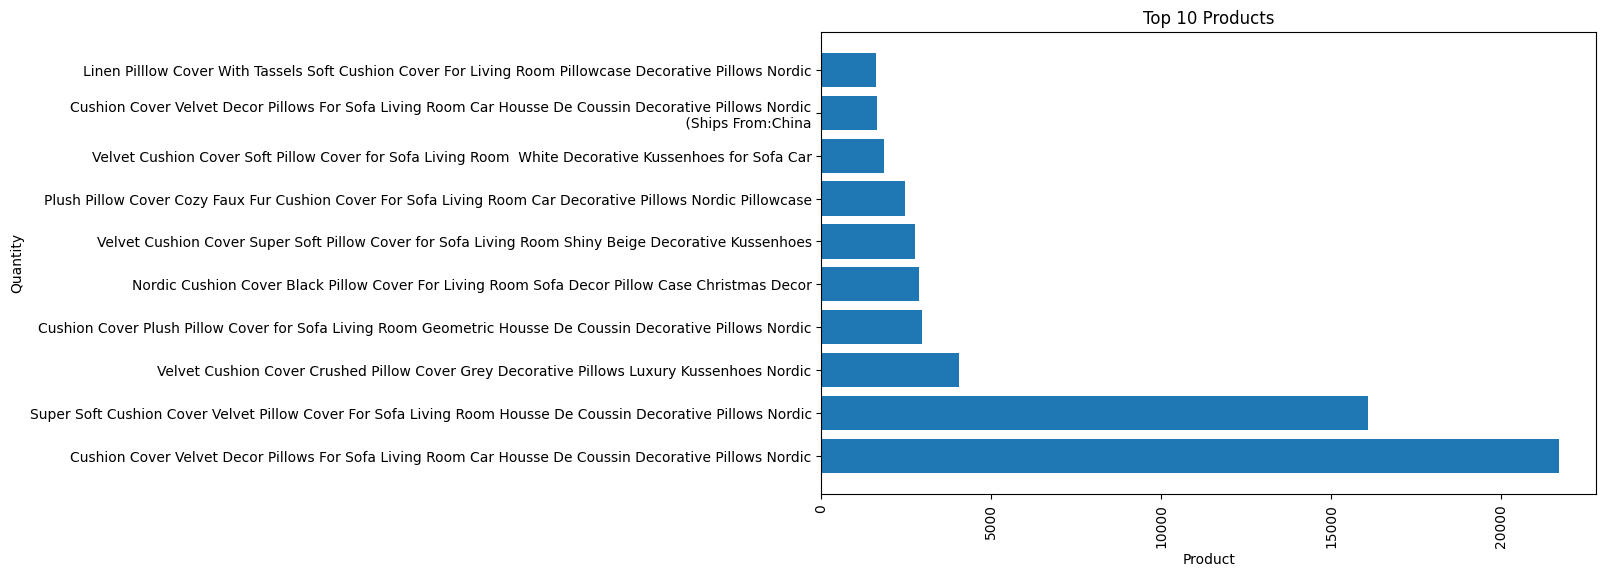

In [108]:
#Group the data by the 'Product Information' column and calculate the sum of the 'Quantity' for each product:
product_quantity = sep_cart_df.groupby('Product Information')['Quantity'].sum().reset_index()
#Sort the DataFrame in descending order based on the 'Quantity' column:
product_quantity_sorted = product_quantity.sort_values('Quantity', ascending=False)
top_10_products = product_quantity_sorted.head(10)
top_10_products
# Plotting the top 10 products
plt.figure(figsize=(10, 6))
plt.barh(top_10_products['Product Information'], top_10_products['Quantity'])
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.title('Top 10 Products')
plt.xticks(rotation=90)
plt.show()

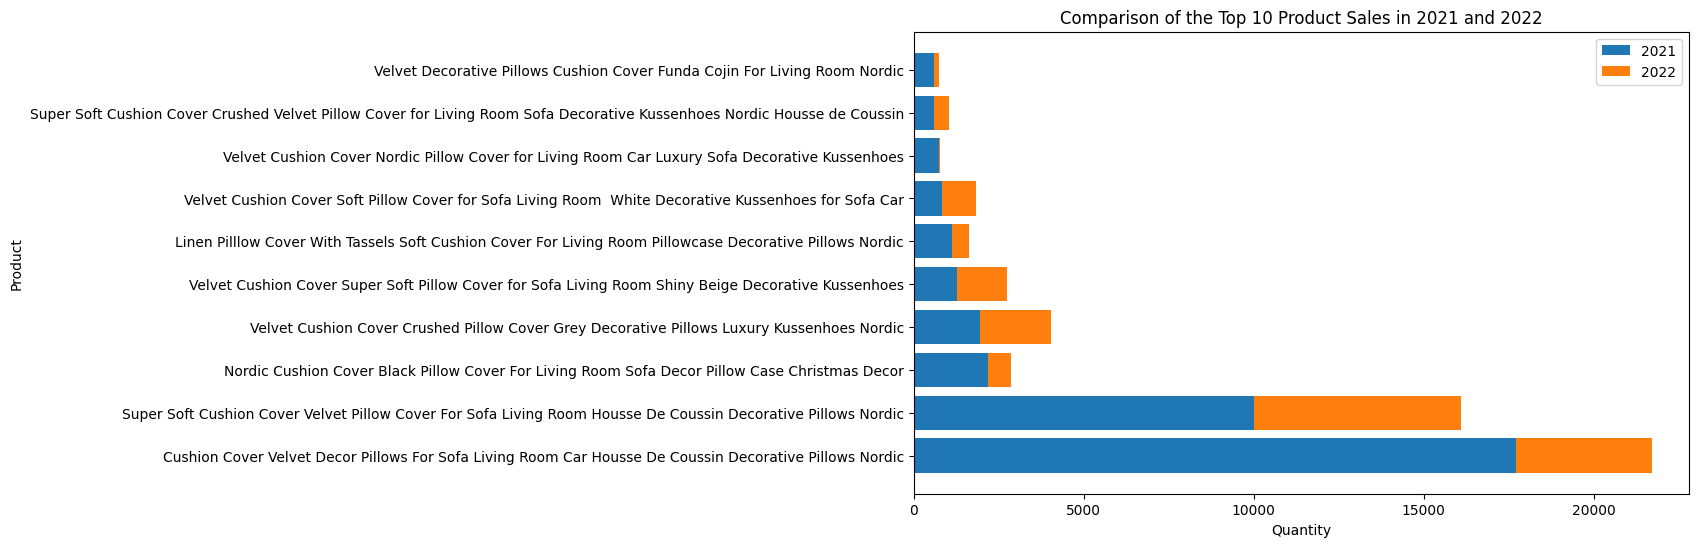

In [109]:
# Add a new column to sep_cart_df indicating the year of purchase
sep_cart_df['Year'] = np.where(sep_cart_df['Order Date'].dt.year == 2021, '2021', '2022')

# Group the data by both 'Product Information' and 'Year' and calculate the sum of 'Quantity' for each group
product_year_quantity = sep_cart_df.groupby(['Product Information', 'Year'])['Quantity'].sum().reset_index()

# Pivot the data to create separate columns for the two years
product_year_pivot = product_year_quantity.pivot(index='Product Information', columns='Year', values='Quantity').fillna(0)

# Select the top 10 products from the 2021 data
top_10_products_2021 = product_year_pivot.sort_values('2021', ascending=False).head(10)

# Create a stacked horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_products_2021.index, top_10_products_2021['2021'], label='2021')
plt.barh(top_10_products_2021.index, top_10_products_2021['2022'], left=top_10_products_2021['2021'], label='2022')
plt.xlabel('Quantity')
plt.ylabel('Product')
plt.title('Comparison of the Top 10 Product Sales in 2021 and 2022')
plt.legend()
plt.show()


The quantity of the popular product sold in 2021 has decreased so much for 2022.

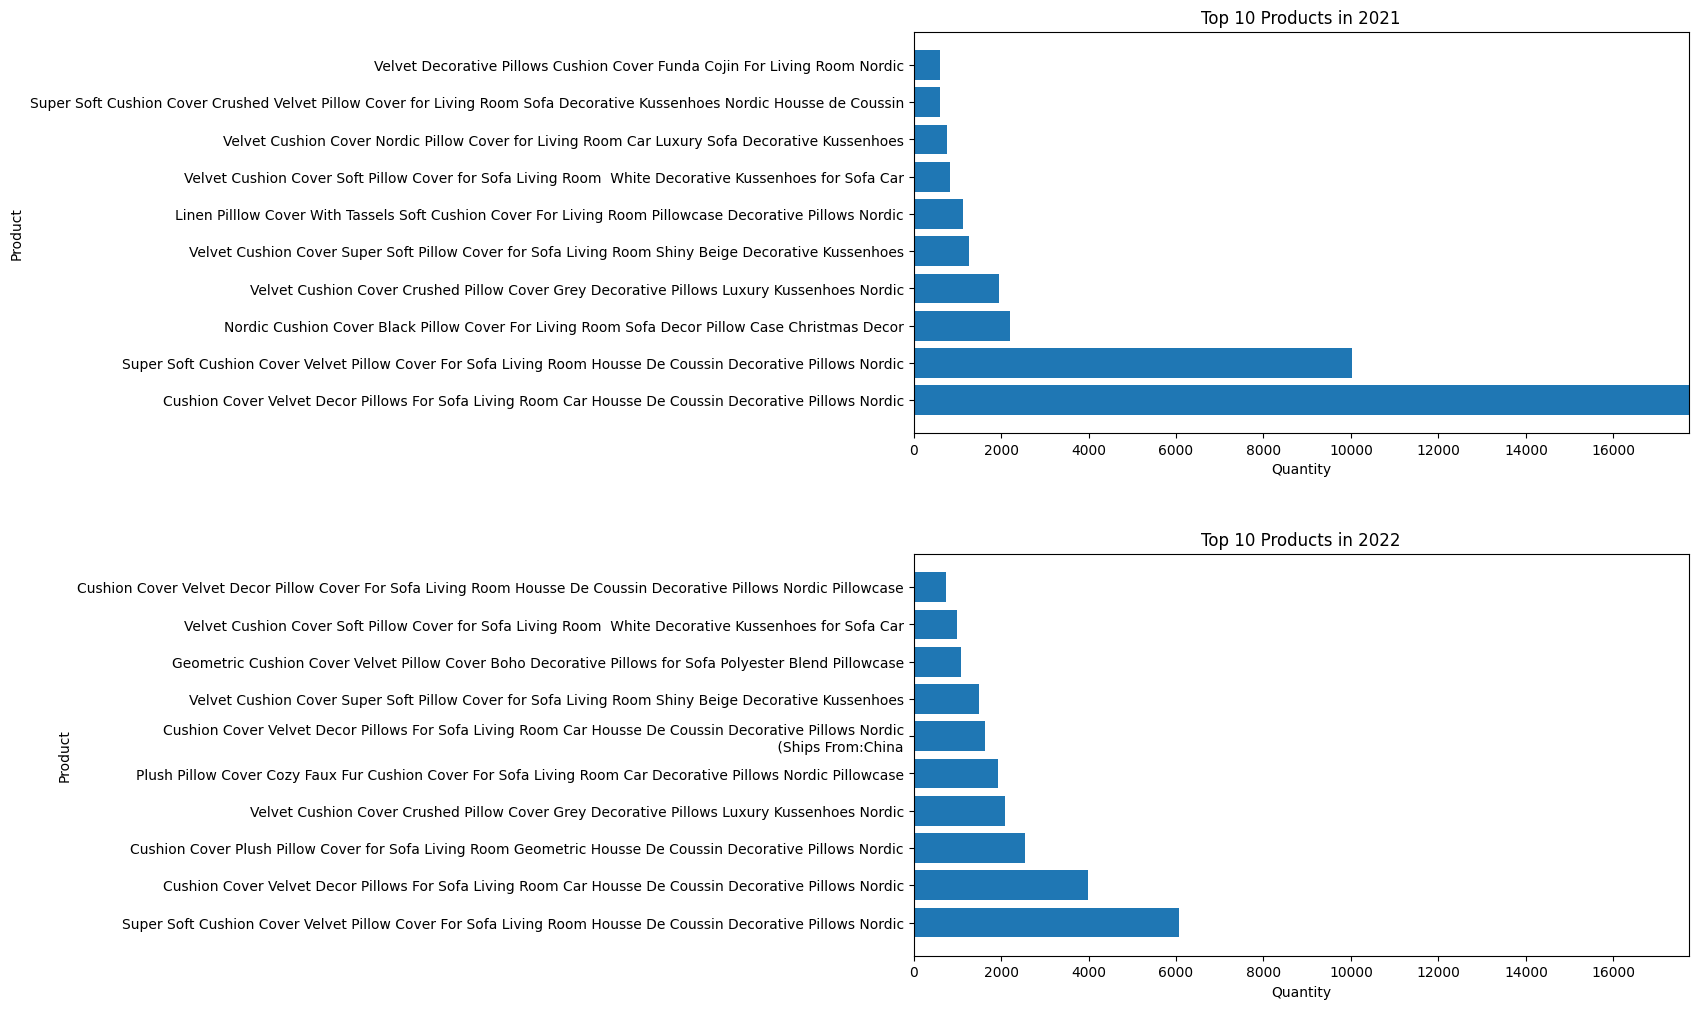

In [110]:
# Group the data by the 'Product Information' column and calculate the sum of the 'Quantity' for each product for 2021:
product_quantity_2021 = sep_cart_df_2021.groupby('Product Information')['Quantity'].sum().reset_index()

# Sort the DataFrame in descending order based on the 'Quantity' column:
product_quantity_sorted_2021 = product_quantity_2021.sort_values('Quantity', ascending=False)

# Select the top 10 products:
top_10_products_2021 = product_quantity_sorted_2021.head(10)

# Group the data by the 'Product Information' column and calculate the sum of the 'Quantity' for each product for 2022:
product_quantity_2022 = sep_cart_df_2022.groupby('Product Information')['Quantity'].sum().reset_index()

# Sort the DataFrame in descending order based on the 'Quantity' column:
product_quantity_sorted_2022 = product_quantity_2022.sort_values('Quantity', ascending=False)

# Select the top 10 products:
top_10_products_2022 = product_quantity_sorted_2022.head(10)


# Create a figure with two subplots, one on top of the other
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot the top 10 products for 2021 on the first subplot
ax1.barh(top_10_products_2021['Product Information'], top_10_products_2021['Quantity'])
ax1.set_xlabel('Quantity')
ax1.set_ylabel('Product')
ax1.set_title('Top 10 Products in 2021')

# Plot the top 10 products for 2022 on the second subplot
ax2.barh(top_10_products_2022['Product Information'], top_10_products_2022['Quantity'])
ax2.set_xlabel('Quantity')
ax2.set_ylabel('Product')
ax2.set_title('Top 10 Products in 2022')

# Set the limits of the x-axis on both subplots to be the same
max_val = max(top_10_products_2021['Quantity'].max(), top_10_products_2022['Quantity'].max())
ax1.set_xlim(0, max_val)
ax2.set_xlim(0, max_val)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.3)

# Display the plot
plt.show()


Some products ranked top ten in 2022 have changed.
Below is a table that showed the list of products that were present in both the top ten 2021 products and top ten 2022 products.

In [111]:
# Concatenate the two dataframes
top10_2021_2022 = pd.concat([top_10_products_2021, top_10_products_2022], ignore_index=True)
top10_2021_2022 = top10_2021_2022.drop_duplicates(subset='Product Information')

present_top_2122 = pd.merge(top_10_products_2021, top_10_products_2022, on='Product Information', how='inner')
present_top_2122 = present_top_2122.rename(columns={'Quantity_x': 'Quantity_2021', 'Quantity_y': 'Quantity_2022'})
present_top_2122

#The products that were present in both the top ten 2021 products and top ten 2022 products.

,Product Information,Quantity_2021,Quantity_2022
0,Cushion Cover Velvet Decor Pillows For Sofa Li...,17717,3989
1,Super Soft Cushion Cover Velvet Pillow Cover F...,10018,6068
2,Velvet Cushion Cover Crushed Pillow Cover Grey...,1959,2094
3,Velvet Cushion Cover Super Soft Pillow Cover f...,1264,1489
4,Velvet Cushion Cover Soft Pillow Cover for Sof...,831,1002


In [107]:
pip install nbformat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 1.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 kB 1.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.8/330.8 kB 3.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [110]:
pip install --upgrade nbformat


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [114]:
# Create an empty list to store the traces
data = []

# Define a color scale
color_scale = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Plot the line chart for each of the top 10 products in 2022
for i, product in enumerate(present_top_2122['Product Information']):
    # Filter the data for the selected product
    product_2021 = sep_cart_df_2021[sep_cart_df_2021['Product Information'] == product]
    product_2022 = sep_cart_df_2022[sep_cart_df_2022['Product Information'] == product]

    # Group the data by month and calculate the total quantity
    product_2021_month = product_2021.groupby(pd.Grouper(key='Order Date', freq='M'))['Quantity'].sum().reset_index()
    product_2022_month = product_2022.groupby(pd.Grouper(key='Order Date', freq='M'))['Quantity'].sum().reset_index()

    # Create a trace for 2021 data with a specific color
    trace1 = go.Scatter(x=product_2021_month['Order Date'], y=product_2021_month['Quantity'],
                        mode='lines+markers', name='2021 - ' + product, line=dict(color=color_scale[i]))

    # Create a trace for 2022 data with the same color
    trace2 = go.Scatter(x=product_2022_month['Order Date'], y=product_2022_month['Quantity'],
                        mode='lines+markers', name='2022 - ' + product, line=dict(color=color_scale[i]))

    # Add the traces to the data list
    data.append(trace1)
    data.append(trace2)

# Define the layout of the chart
layout = go.Layout(
    title='Product Quantity Comparison: 2021 vs 2022',
    xaxis=dict(title='Order Date'),
    yaxis=dict(title='Quantity'),
    legend=dict(orientation='h', y=-0.2),  # Set the legend position below the graph
    height=800,
    width=1000
)

# Create a figure object with the data and layout
fig = go.Figure(data=data, layout=layout)


# Show the figure
fig.show()
# Assuming 'fig' is your Plotly figure object from the provided code
# fig.write_html("/Users/tszeyenthen/Python Study/jupyter notebbok/WQD7007/try.html")

/var/folders/h2/q_r6y6bd5f5c9hvfsfnt31xr0000gn/T/ipykernel_1389/1055618145.py:14: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/var/folders/h2/q_r6y6bd5f5c9hvfsfnt31xr0000gn/T/ipykernel_1389/1055618145.py:15: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/Users/tszeyenthen/Python Study/venv-sereinsetupjupyter/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/var/folders/h2/q_r6y6bd5f5c9hvfsfnt31xr0000gn/T/ipykernel_1389/1055618145.py:14: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/var/folders/h2/q_r6y6bd5f5c9hvfsfnt31xr0000gn/T/ipykernel_1389/1055618145.py:15: Futu

For the five products that have consistently remained top ranking throughout 2021 to 2022, we can see some patterns for some of them.
Firstly, the sale of blue and orange colored products is showing a downward trend.

Secondly, Velvet Cushion Cover Crushed Pillow Cover Grey Decorative Pillows Luxury Kussenhoes Nordic appears to show an increase of sale in January and during the month of November.
Thirdly, Velvet Cushion Covoer Soft Pillow for Sofa Living Room White Doratve Kuussenhoes for Sofa Car showed a spike in both March of 2021 and 2022 but it showed no increase of sale in November 2022.

# Does the choice of Shipping Method affect purchases?


In [118]:
success_purchase = cart_df[cart_df["订单状态"] == "交易完成"]
unsuccess_purchase_a = cart_df[cart_df["订单状态"] == "订单关闭"]
unsuccess_purchase_b = cart_df[cart_df["订单状态"] == "等待买家收货"]
unsuccess_purchase = pd.concat([unsuccess_purchase_a, unsuccess_purchase_b])


In [119]:
success_counts_shipping = success_purchase['买家选择物流'].value_counts()
unsuccess_counts_shipping = unsuccess_purchase['买家选择物流'].value_counts()

# Filter the top ten shipping methods based on successful and unsuccessful purchases
top_success_shipping = success_counts_shipping.nlargest(10).index
top_unsuccess_shipping = unsuccess_counts_shipping.nlargest(10).index

# Filter the DataFrame for the top ten shipping methods
filtered_success_df_s = success_counts_shipping.loc[top_success_shipping]
filtered_unsuccess_df_s = unsuccess_counts_shipping.loc[top_unsuccess_shipping]

# Calculate the success and unsuccess rates for the top ten shipping methods
top_success_rates_s = filtered_success_df_s / len(success_purchase)
top_unsuccess_rates_s = filtered_unsuccess_df_s / len(unsuccess_purchase)

# Create a DataFrame for the top ten shipping methods and their rates
top_df = pd.DataFrame({'Shipping Methods': top_success_shipping,
                       'Success Rate': top_success_rates_s.values,
                       'Unsuccessful Rate': top_unsuccess_rates_s.values})

fig = px.bar(top_df, x='Shipping Methods', y=['Success Rate', 'Unsuccessful Rate'],
             barmode='group', title='Success and Unsuccessful Purchase Rates of Top 10 Shipping Methods')
fig.show()

/Users/tszeyenthen/Python Study/venv-sereinsetupjupyter/lib/python3.11/site-packages/plotly/express/_core.py:1992: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Success rates and Unsuccessful Rates Based on Shipping Methods are about the same except with AliExpress Saver Shipping and Cainiao Super Economy Global being the only two shipping methods with slightly higher unsuccess rates.

In [116]:
two_purchase_categories = cart_df.copy()

two_purchase_categories['订单状态'] = two_purchase_categories['订单状态'].replace(['交易完成'], 'Successful Purchase')
two_purchase_categories['订单状态'] = two_purchase_categories['订单状态'].replace(['订单关闭', '等待买家收货'], 'Unsuccessful Purchase')

two_purchase_categories = two_purchase_categories.rename(columns={'订单号': 'Order Number',
                                          '订单状态': 'Order Status',
                                          '下单时间': 'Order Date',
                                          '商品信息': 'Product Information',
                                          '买家名称': 'Buyer Name',
                                          '收货国家': 'Shipping Country',
                                          '买家选择物流': "Shipping Method",
                                          '数量': 'Quantity',
                                          '颜色': 'Color',
                                          '型号': 'Size'})

contingency_table = pd.crosstab(two_purchase_categories['Order Status'], two_purchase_categories['Shipping Method'])
contingency_table

# Perform chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square test statistic:", chi2)
print("p-value:", p)



Chi-square test statistic: 78.36229109209702
p-value: 8.514145068563736e-05


Since the p-value is less than the significance level (commonly 0.05), we can reject the null hypothesis. This suggests that there is a statistically significant association between the shipping methods and purchase status (successful or unsuccessful).

It is important to note that even though chi-square test suggests an association between shipping methods and purchase status, the similar success and unsuccessful rates shown in the previous graph indicate that the practical significance of this association may be limited.

Since we observed similar success and unsuccessful rates for different shipping methods, it suggests that the choice of shipping method may not have a substantial impact on the likelihood of a purchase being successful or unsuccessful or the significant chi-square test result could be driven by other factors, such as the distribution of purchases across shipping methods or the specific characteristics of the dataset.


# Number of orders based on countries

In [115]:
import plotly.graph_objs as go
import plotly.io as pio

# Calculate the number of orders per country
countries = cart_df['收货国家'].value_counts()

# Define the choropleth data
data = dict(
    type='choropleth',
    locations=countries.index,
    locationmode='country names',
    z=countries,
    text=countries.index,
    colorbar={'title': 'Order Count'},
    colorscale=[
        [0, 'rgb(224,255,255)'],
        [0.01, 'rgb(166,206,227)'],
        [0.02, 'rgb(31,120,180)'],
        [0.03, 'rgb(178,223,138)'],
        [0.05, 'rgb(51,160,44)'],
        [0.10, 'rgb(251,154,153)'],
        [0.20, 'rgb(255,255,0)'],
        [1, 'rgb(227,26,28)']
    ],
    reversescale=False
)

# Define the layout
layout = dict(
    title='Number of Orders per Country',
    geo=dict(showframe=True, projection={'type': 'mercator'}),
    width=1200,
    height=1000
)

# Create the choropleth map figure
choromap = go.Figure(data=[data], layout=layout)

# Display the choropleth map
pio.show(choromap)


In [120]:
# Calculate the total count of unsuccessful purchases
counts_country = cart_df['收货国家'].value_counts()
total_country_count = counts_country.sum()

# Calculate the percentage of each country in the unsuccessful purchase dataset
percentage_countries = (counts_country / total_country_count) * 100

# Create the pie plot using Plotly
fig = go.Figure(data=go.Pie(labels=percentage_countries.index,
                           values=percentage_countries,
                           texttemplate="%{label}: %{value:.1f}%",
                           textposition="inside",
                           hole=0.3))

fig.update_layout(
    title="Distribution of Countries in Total Purchases",
    legend=dict(orientation="v", yanchor="middle", y=0.5, xanchor="auto", x=1.1),
)

fig.show()


In [121]:
# Group the data by country and order status and count the occurrences
grouped_data = two_purchase_categories.groupby(['Shipping Country', 'Order Status']).size().unstack()

# Reset the index to make the country column accessible for plotting
grouped_data = grouped_data.reset_index()

# Calculate the total count of successful and unsuccessful purchases for each country
grouped_data['Total'] = grouped_data['Successful Purchase'] + grouped_data['Unsuccessful Purchase']

# Sort the data by the total count in descending order
grouped_data = grouped_data.sort_values(by='Total', ascending=False).head(10)

# Create the stacked bar chart using Plotly
fig = px.bar(grouped_data, x='Shipping Country', y=['Successful Purchase', 'Unsuccessful Purchase'],
             barmode='stack', title='Distribution of Top 10 Countries in Successful and Unsuccessful Purchases')

fig.show()


/Users/tszeyenthen/Python Study/venv-sereinsetupjupyter/lib/python3.11/site-packages/plotly/express/_core.py:1992: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [122]:
# Calculate the total count of unsuccessful purchases
unsuccess_counts_country = unsuccess_purchase['收货国家'].value_counts()
total_unsuccessful_count = unsuccess_counts_country.sum()

# Calculate the percentage of each country in the unsuccessful purchase dataset
percentage_unsuccessful = (unsuccess_counts_country / total_unsuccessful_count) * 100

# Create the pie plot using Plotly
fig = go.Figure(data=go.Pie(labels=percentage_unsuccessful.index,
                           values=percentage_unsuccessful,
                           texttemplate="%{label}: %{value:.1f}%",
                           textposition="inside",
                           hole=0.3))

fig.update_layout(
    title="Distribution of Countries in Unsuccessful Purchase",
    legend=dict(orientation="v", yanchor="middle", y=0.5, xanchor="auto", x=1.1),
)

fig.show()


Although Spain being the country with the highest number of purchases from this store, Russia takes the lead in terms of unsuccessful transactions.

In [123]:
completed_transactions_df = sep_cart_df[sep_cart_df['Order Status'] == '交易完成']

In [124]:
completed_transactions_df

,Order Number,Order Status,Order Date,Product Information,Buyer Name,Shipping Country,Shipping Method,Quantity,Color,Size,Year
0,8123681367427335,交易完成,2021-01-01,Cushion Cover Velvet Decor Pillows For Sofa Li...,FR shopper,France,Cainiao Super Economy Global\n,1,as picture,50x50cm,2021
1,3008251234701122,交易完成,2021-01-01,Cushion Cover Velvet Decor Pillows For Sofa Li...,mohammed mazarwa,Israel,Cainiao Super Economy Global\n,1,as picture,45x45cm,2021
2,3008171524916140,交易完成,2021-01-01,Cushion Cover Velvet Decor Pillows For Sofa Li...,Soppe Amar,France,AliExpress Standard Shipping\n,2,as picture,40x40cm,2021
3,3008247175413711,交易完成,2021-01-01,Velvet Cushion Cover for Sofa Decorative Pillo...,Celine Goossens,Netherlands,AliExpress Standard Shipping\n,2,Black,450mmx450mm,2021
4,8123818845097147,交易完成,2021-01-01,Imitation Leather Cushion Cover Throw Pillows ...,Marie Claude Dubuc,Canada,Cainiao Super Economy Global\n,1,as picture,450mm*450mm,2021
...,...,...,...,...,...,...,...,...,...,...,...
49808,3020253120038745,交易完成,2022-12-29,Super Soft Cushion Cover Velvet Pillow Cover F...,Valentin Tho gnia yang,France,AliExpress Standard Shipping\n,3,as picture,40x40cm,2022
49809,3020253120038745,交易完成,2022-12-29,Super Soft Cushion Cover Velvet Pillow Cover F...,Valentin Tho gnia yang,France,AliExpress Standard Shipping\n,2,as picture,30x50cm,2022
49819,3020420218786254,交易完成,2022-12-30,Plush Pillow Cover Cozy Faux Fur Cushion Cover...,Suzanne s,Netherlands,AliExpress Saver Shipping\n,1,as picture,45x45cm,2022
49826,3020405003143188,交易完成,2022-12-30,Cushion Cover Plush Pillow Cover for Sofa Livi...,laetitia Guy,France,AliExpress Saver Shipping\n,2,As Picture,40x40cm,2022


Inventory Forecasting

Method 1: ARIMA

In [ ]:
#Step 1: Step 1: Aggregate Data by Date
# Convert '下单时间' to datetime format
completed_transaction_df['下单时间'] = pd.to_datetime(completed_transaction_df['下单时间'])

# Aggregate order quantities by date
daily_demand = completed_transaction_df.groupby('下单时间')['数量'].sum().reset_index()

# Set '下单时间' as the index to create a time series
daily_demand.set_index('下单时间', inplace=True)

In [ ]:
#Step 2: ARIMA Model Pseudo-Code

from statsmodels.tsa.arima.model import ARIMA

# Assuming daily_demand is the Series of daily total quantities

# Fit an ARIMA model (the order (p,d,q) needs to be determined based on data characteristics)
model = ARIMA(daily_demand, order=(p,d,q))
model_fit = model.fit()

# Forecast future demand (the steps parameter specifies how many periods to forecast)
forecast = model_fit.forecast(steps=30)  # For example, forecasting the next 30 days

Method 2: Regression

In [ ]:
pip install statsmodels

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming df_prediction is your DataFrame and daily_demand contains the aggregated daily demand
# Example of creating a numerical feature for regression (e.g., days since start)
daily_demand['Day'] = np.arange(len(daily_demand))

# Target variable
y = daily_demand['数量'].values

# Feature matrix
X = daily_demand[['Day']].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Plotting the actual vs predicted demand
plt.figure(figsize=(10, 6))
plt.plot(daily_demand.index[-len(y_test):], y_test, label='Actual Demand', marker='o')
plt.plot(daily_demand.index[-len(y_test):], y_pred, label='Predicted Demand', marker='x')
plt.title('Demand Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)


In [ ]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)


In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(max_depth=5)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

In [12]:
# Assuming 'Order Date' is already in datetime format. If not, convert it first:
# completed_transactions_df['Order Date'] = pd.to_datetime(completed_transactions_df['Order Date'])

min_order_date = completed_transactions_df['Order Date'].min()

# Calculate the difference in days as a Series, then divide by 7 and add 1
completed_transactions_df['Week'] = ((completed_transactions_df['Order Date'] - min_order_date).dt.days // 7) + 1


/var/folders/h2/q_r6y6bd5f5c9hvfsfnt31xr0000gn/T/ipykernel_19425/3443035567.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_transactions_df['Week'] = ((completed_transactions_df['Order Date'] - min_order_date).dt.days // 7) + 1


In [13]:
completed_transactions_df

,Order Number,Order Status,Order Date,Product Information,Buyer Name,Shipping Country,Shipping Method,Quantity,Color,Size,Week
0,8131154430968489,交易完成,2020-01-01,Cushion Cover Velvet Decor Pillows For Sofa Li...,Mirella Angel,Brazil,Aliexpress Direct\n,1,as picture,45x45cm,1
1,5009127913653108,交易完成,2020-01-01,Nordic Cushion Cover Black Pillow Cover For Li...,ukokru.,Russian Federation,AliExpress Saver Shipping\n,1,As picture,45x45cm,1
2,8129040594221349,交易完成,2020-01-01,Super Soft Cushion Cover Velvet Pillow Cover F...,jbedecarratz user,Chile,AliExpress Saver Shipping\nAliExpress Standard...,2,as picture,40x40cm,1
3,8134317518536175,交易完成,2020-01-01,Plush Cushion Cover Geometric Pillow Cover for...,CK Tsang,Canada,Cainiao Super Economy Global\nChina Post Regis...,1,As Picture,45x45cm,1
4,8137313424228073,交易完成,2020-01-01,Linen Pilllow Cover With Tassels Soft Cushion ...,Xuanjiao Zhu,Germany,AliExpress Standard Shipping\n,1,as picture,45x45cm,1
...,...,...,...,...,...,...,...,...,...,...,...
74753,3020529436940688,交易完成,2022-12-29,Plush Pillow Cover Cozy Faux Fur Cushion Cover...,Hasret Karaca,Netherlands,AliExpress Standard Shipping\n,2,as picture,45x45cm,157
74758,3020424624817858,交易完成,2022-12-29,Super Soft Cushion Cover Velvet Pillow Cover F...,meis elias,Spain,AliExpress Saver Shipping\n,2,as picture,30x50cm,157
74777,3020285683695849,交易完成,2022-12-30,Plush Pillow Cover Cozy Faux Fur Cushion Cover...,Cruz Claudia,France,AliExpress Standard Shipping\n,2,as picture,45x45cm,157
74793,3020420218786254,交易完成,2022-12-30,Plush Pillow Cover Cozy Faux Fur Cushion Cover...,Suzanne s,Netherlands,AliExpress Saver Shipping\n,1,as picture,45x45cm,157


In [14]:
#Cycle each year
# Ensure '下单时间' or 'Order Date' is a datetime column
completed_transactions_df['Order Date'] = pd.to_datetime(completed_transactions_df['Order Date'])

# Sort the DataFrame by 'Order Date' to ensure correctness
completed_transactions_df = completed_transactions_df.sort_values('Order Date')

# Function to calculate relative week numbers within each year
def calculate_relative_weeks(group):
    group['Relative Week'] = ((group['Order Date'] - group['Order Date'].min()).dt.days // 7) + 1
    return group

# Apply the function to each year's group
completed_transactions_df['Year'] = completed_transactions_df['Order Date'].dt.year
completed_transactions_df = completed_transactions_df.groupby('Year').apply(calculate_relative_weeks)

# Display the DataFrame to verify the changes
completed_transactions_df[['Order Date', 'Year', 'Relative Week']].head()


/var/folders/h2/q_r6y6bd5f5c9hvfsfnt31xr0000gn/T/ipykernel_19425/134131443.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_transactions_df['Order Date'] = pd.to_datetime(completed_transactions_df['Order Date'])


Order Date  Year  Relative Week
Year                                   
2020 0  2020-01-01  2020              1
     36 2020-01-01  2020              1
     37 2020-01-01  2020              1
     38 2020-01-01  2020              1
     39 2020-01-01  2020              1

In [16]:
# Assuming 'completed_transactions_df' has the correct columns,
# and you want to sum 'Quantity' for each 'Week'
grouped_week = completed_transactions_df.groupby('Week', as_index=False).agg({'Quantity': 'sum'})

# Sorting the resulting DataFrame by 'Week' in ascending order
grouped_week = grouped_week.sort_values('Week', ascending=True)

# Display the first few rows
grouped_week.head()

,Week,Quantity
0,1,617
1,2,775
2,3,743
3,4,616
4,5,594


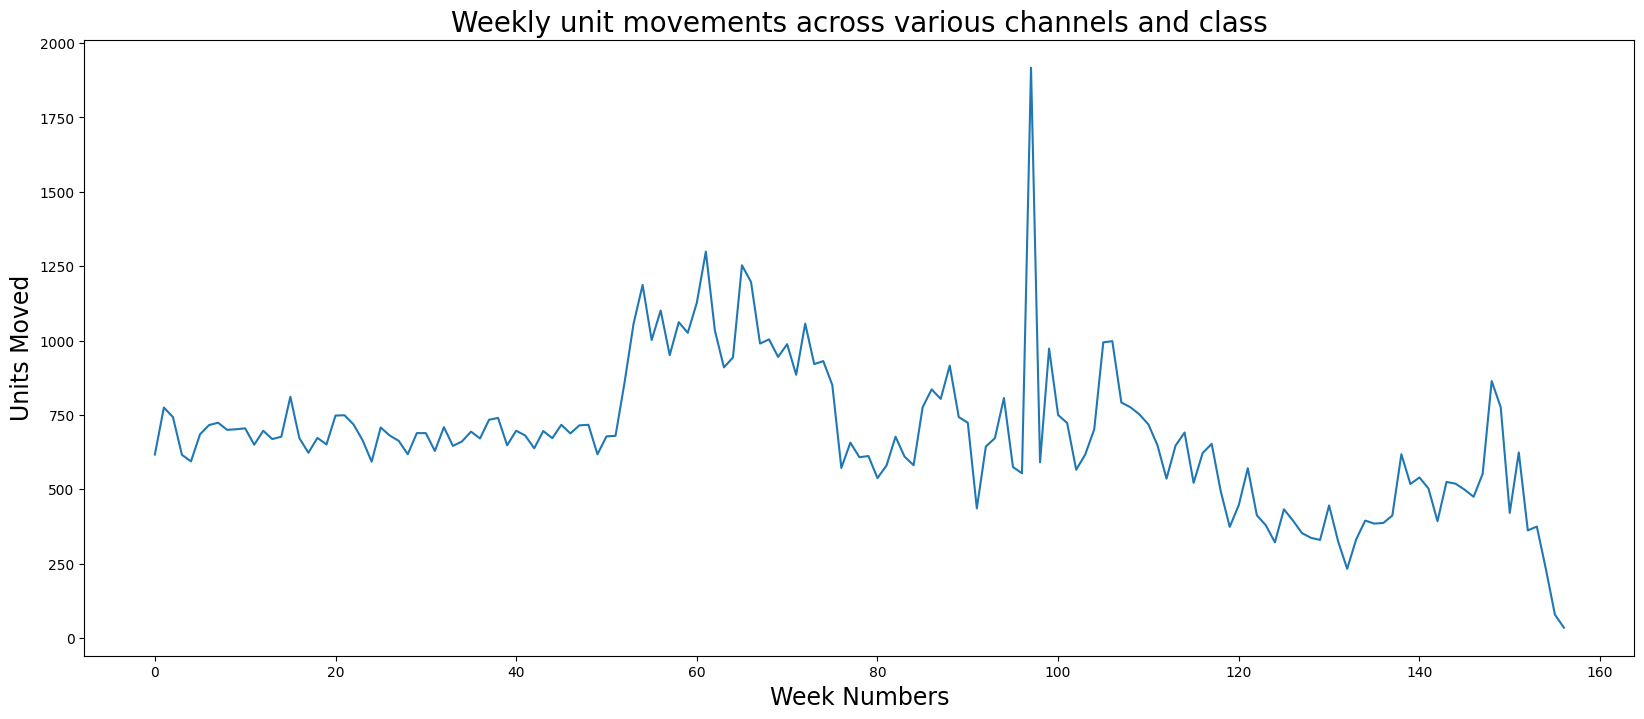

In [17]:
# Plot unit movement :

plt.figure(figsize=(20, 8))
plt.plot(grouped_week.Quantity)
plt.title('Weekly unit movements across various channels and class', size =20)
plt.ylabel('Units Moved',size =17)
plt.xlabel('Week Numbers',size =17)
plt.grid(False)
plt.show()

In [70]:
total_timeser = grouped_week.Quantity
series = grouped_week.Quantity

n_records = len(series)
i = 140

# Creating train and test split and keeping 4 weeks (1 month) gap between both :
# Predicting for next 3 months (13 weeks)
train, test = series[0:i], series[i+4:i+17]

In [69]:
train.head()

0    617
1    775
2    743
3    616
4    594
Name: Quantity, dtype: int64

In [68]:
test.tail()

152    362
153    375
154    232
155     79
156     35
Name: Quantity, dtype: int64

In [67]:
from sklearn.model_selection import train_test_split

# Target variable
y = grouped_week['Quantity'].values

# Feature matrix
X = grouped_week[['Week']].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

Total Observations in weeks: 157
Training Observations in weeks: 140
Testing Observations in weeks: 13


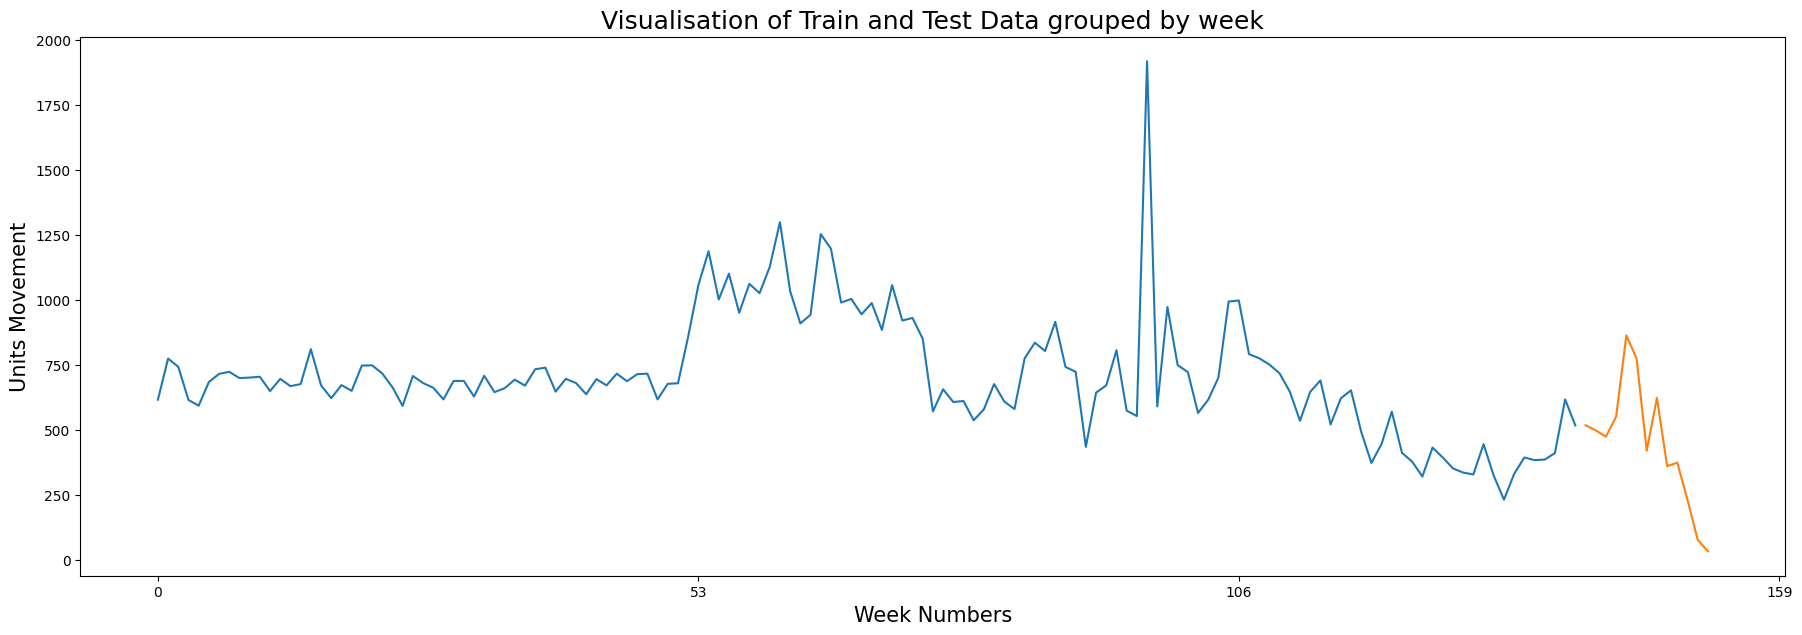

Total Observations in weeks: 157
Training Observations in weeks: 125
Testing Observations in weeks: 32


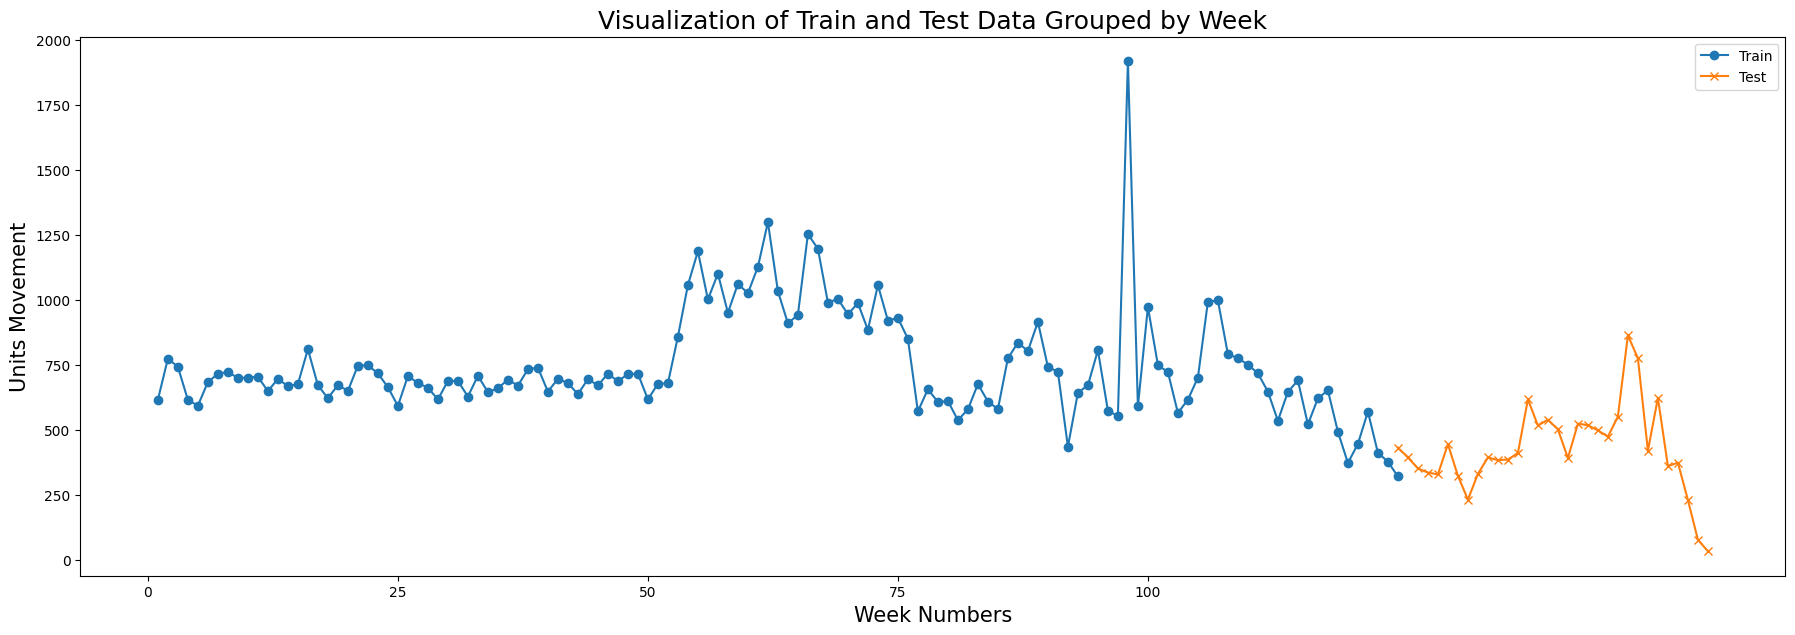

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Print statements reflecting the size of the datasets
print('Total Observations in weeks: %d' % (len(X)))
print('Training Observations in weeks: %d' % (len(X_train)))
print('Testing Observations in weeks: %d' % (len(X_test)))

plt.figure(figsize=(22, 7))
plt.title('Visualization of Train and Test Data Grouped by Week', size=18)

# Adjusting tick spacing
tick_spacing = 25
x_ticks = np.arange(0, 105, tick_spacing)  # Assuming 105 covers all your weeks
plt.xticks(x_ticks)

plt.xlabel("Week Numbers", size=15)
plt.ylabel("Units Movement", size=15)

# Assuming you have y_train and y_test as corresponding values for X_train and X_test
# Plot training data
plt.plot(X_train.flatten(), y_train, 'o-', label='Train')  # Ensure X_train is flattened for consistency

# For a clear separation, find the length of the training data to offset the testing data index
test_index_offset = len(X_train)

# Plot testing data with an offset to maintain continuity but separate from training data
# This approach assumes X_test continues from the last point of X_train
plt.plot(test_index_offset + np.arange(len(X_test)), y_test, 'x-', label='Test')  # Using a different marker for testing data

plt.legend()
plt.show()

Total Observations in weeks: 157
Training Observations in weeks: 125
Testing Observations in weeks: 32


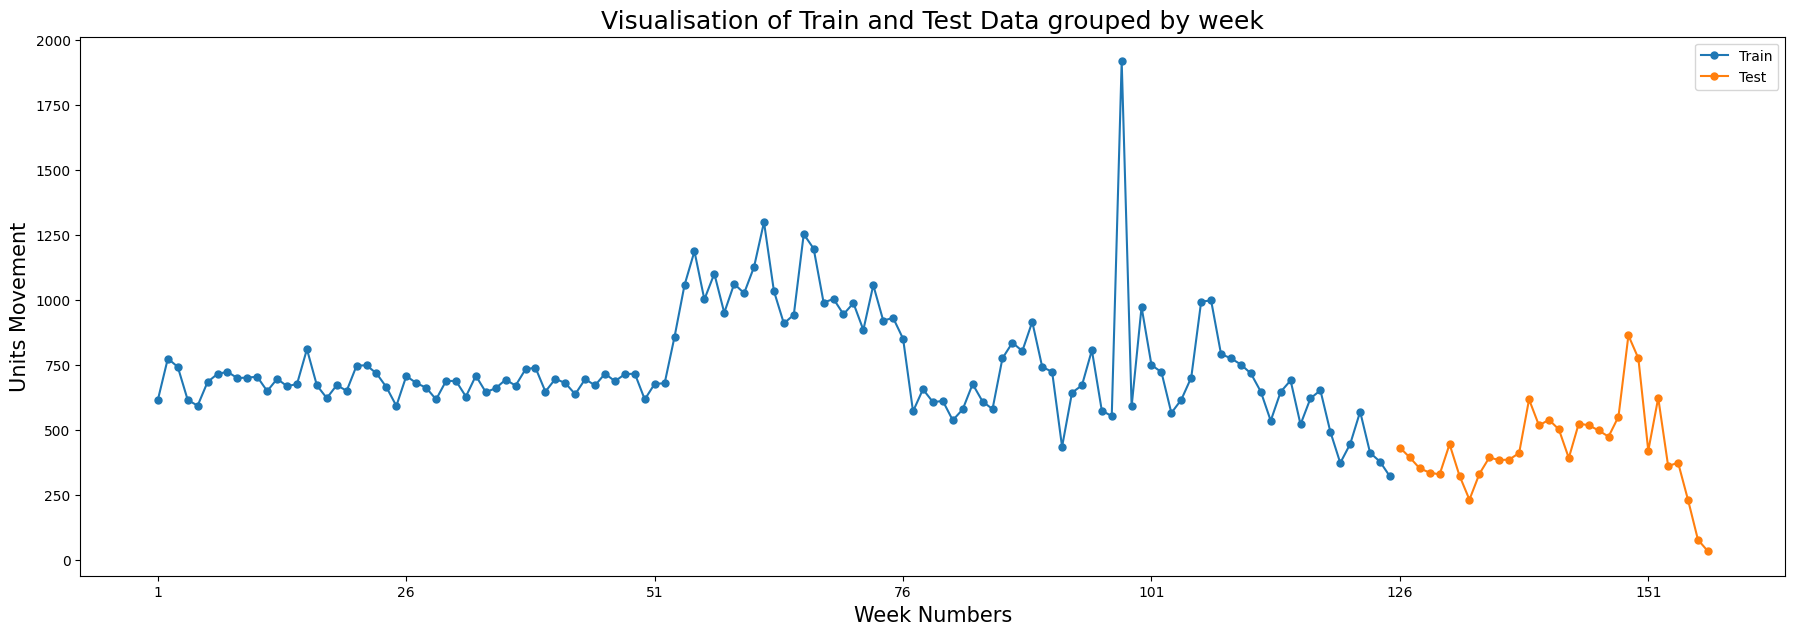

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming the train and test variables should actually refer to your training and testing sets.

# Update print statements to reflect X_train and X_test
print('Total Observations in weeks: %d' % (len(X)))
print('Training Observations in weeks: %d' % (len(X_train)))
print('Testing Observations in weeks: %d' % (len(X_test)))

plt.figure(figsize=(22, 7))
plt.title('Visualisation of Train and Test Data grouped by week', size=18)

# Adjust the ticks to cover the range of weeks in the dataset
week_range = np.arange(X.min(), X.max() + 1, tick_spacing)
plt.xticks(week_range)

plt.xlabel("Week Numbers", size=15)
plt.ylabel("Units Movement", size=15)

# Adjust plotting to show training and testing data
# Assuming 'Week' is a single feature in X, flatten X_train and X_test for plotting
plt.plot(X_train.flatten(), y_train, label='Train', marker='o', linestyle='-', markersize=5)
plt.plot(X_test.flatten(), y_test, label='Test', marker='o', linestyle='-', markersize=5)

plt.legend()
plt.show()

Moving average smoothening :

In [21]:
from sklearn.metrics import mean_absolute_error

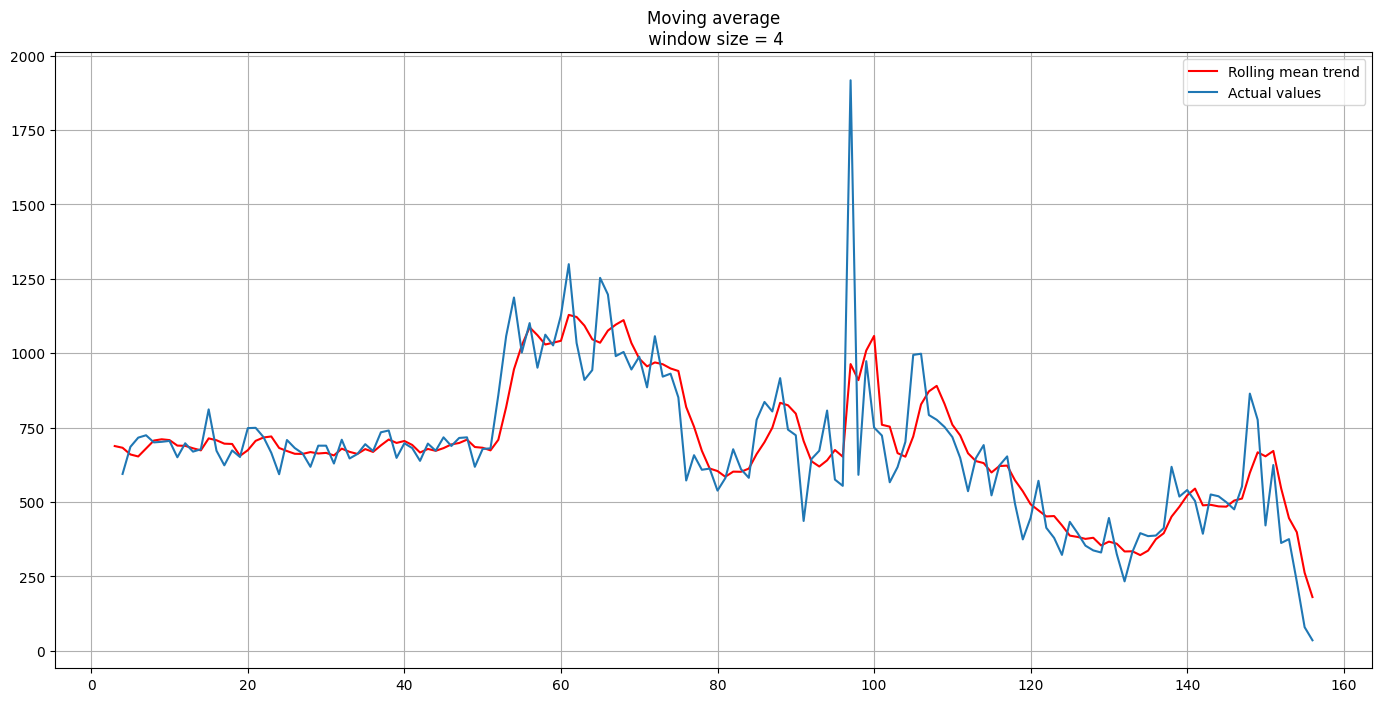

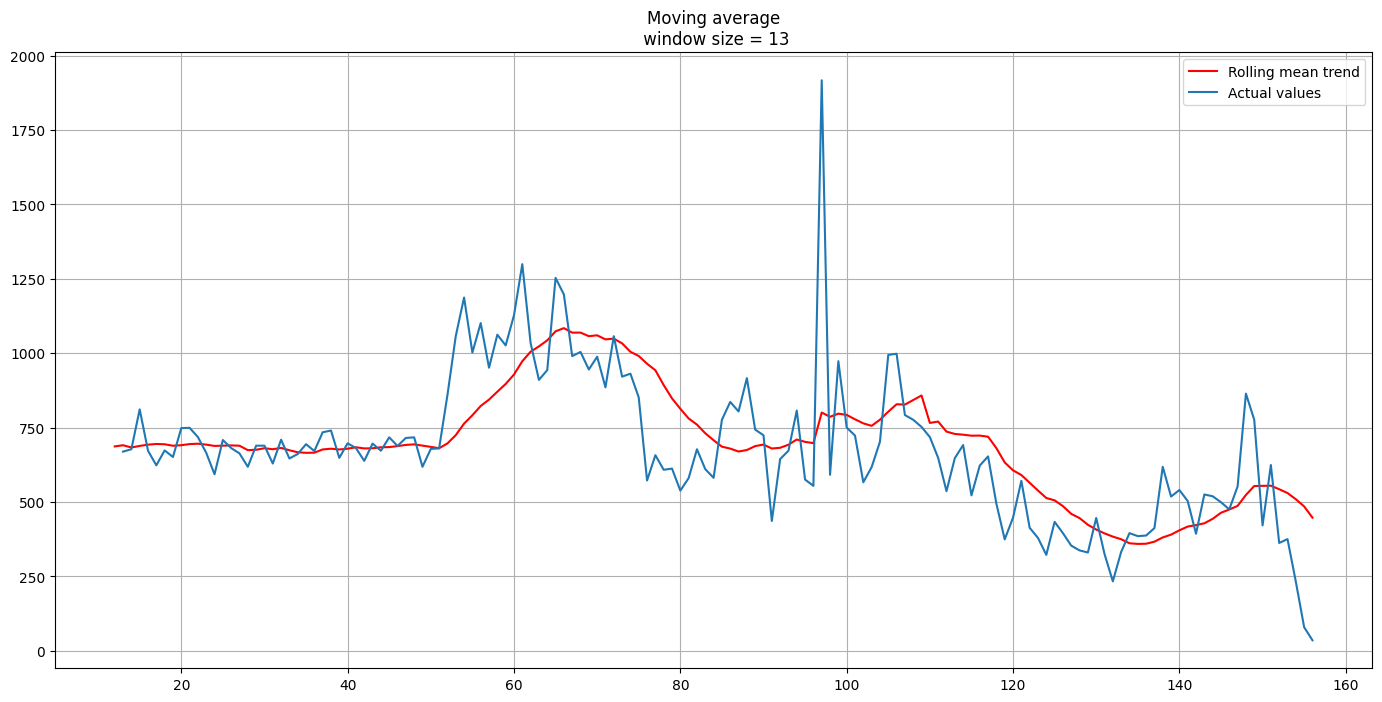

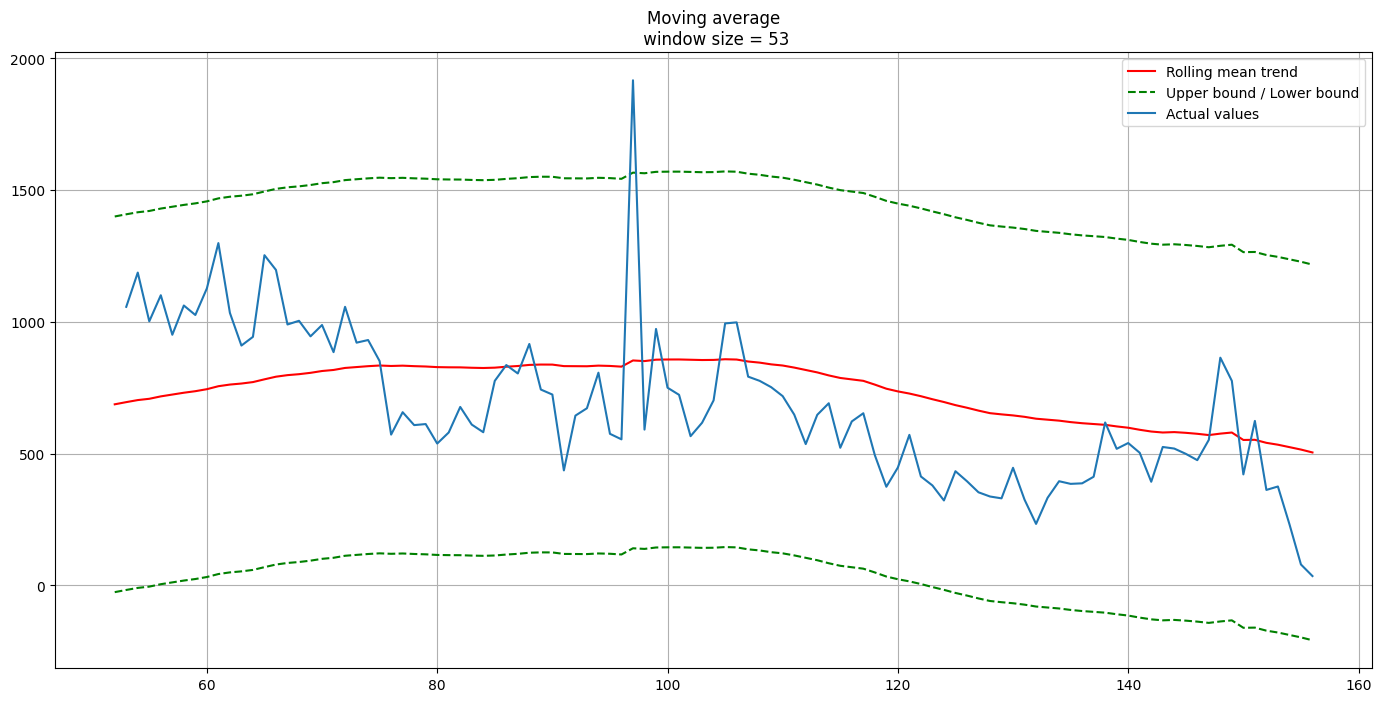

In [22]:
# Let’s use the moving average smoothening to smooth our time series. For that, we will use a helper function that will run the 
# moving average model on a specified time window and it will plot the result smoothed curve:
from sklearn.metrics import mean_absolute_error

def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'r', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'g--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'g--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)
 #data_units['num_units']   
    
#Smooth by the previous 4 weeks ( previous month):
plot_moving_average(grouped_week.Quantity, 4)

#Smooth by previous quarter (90 days), 3 months, 13 weeks :
plot_moving_average(grouped_week.Quantity, 13)

# Smooth by previous year, 53 weeks :
plot_moving_average(grouped_week.Quantity, 53, plot_intervals=True)

Simple Exponential Smoothening:

In [187]:
pip install statsmodels

37228.71s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 614.8 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 1.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


<Axes: >

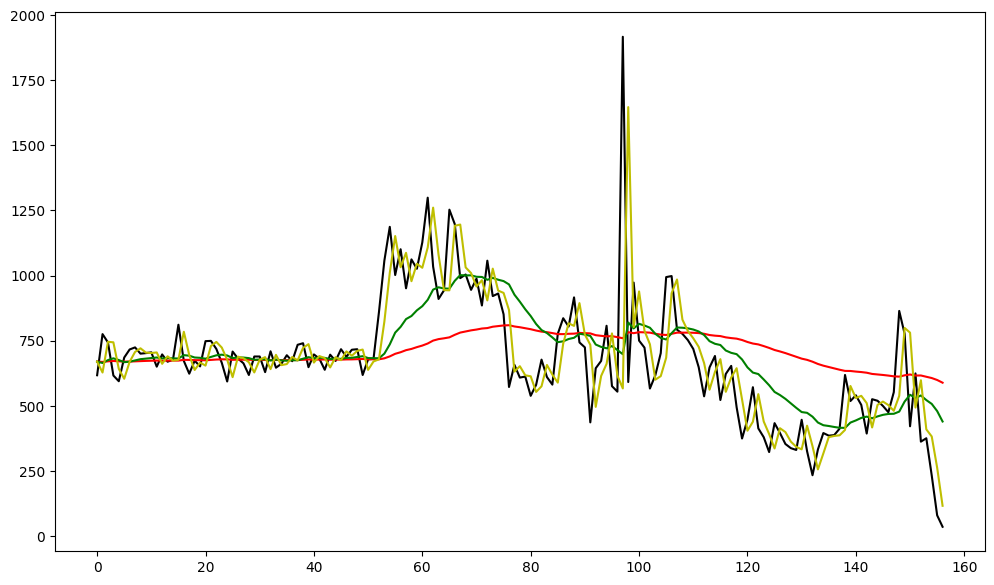

In [23]:
from statsmodels.tsa.api import ExponentialSmoothing

# Now, let’s use exponential smoothing to see if it can pick up a better trend:
y = pd.Series(grouped_week['Quantity'])

fit1 = ExponentialSmoothing(y).fit(smoothing_level=0.02,optimized=False)
fit2 = ExponentialSmoothing(y).fit(smoothing_level=0.1,optimized=False)
fit3 = ExponentialSmoothing(y).fit(smoothing_level=0.8,optimized=False)
plt.figure(figsize = [12,7])
plt.plot(y, color = 'black')
fit1.fittedvalues.plot(color = 'r')
fit2.fittedvalues.plot(color = 'g')
fit3.fittedvalues.plot(color = 'y')

Double exponential smoothing:

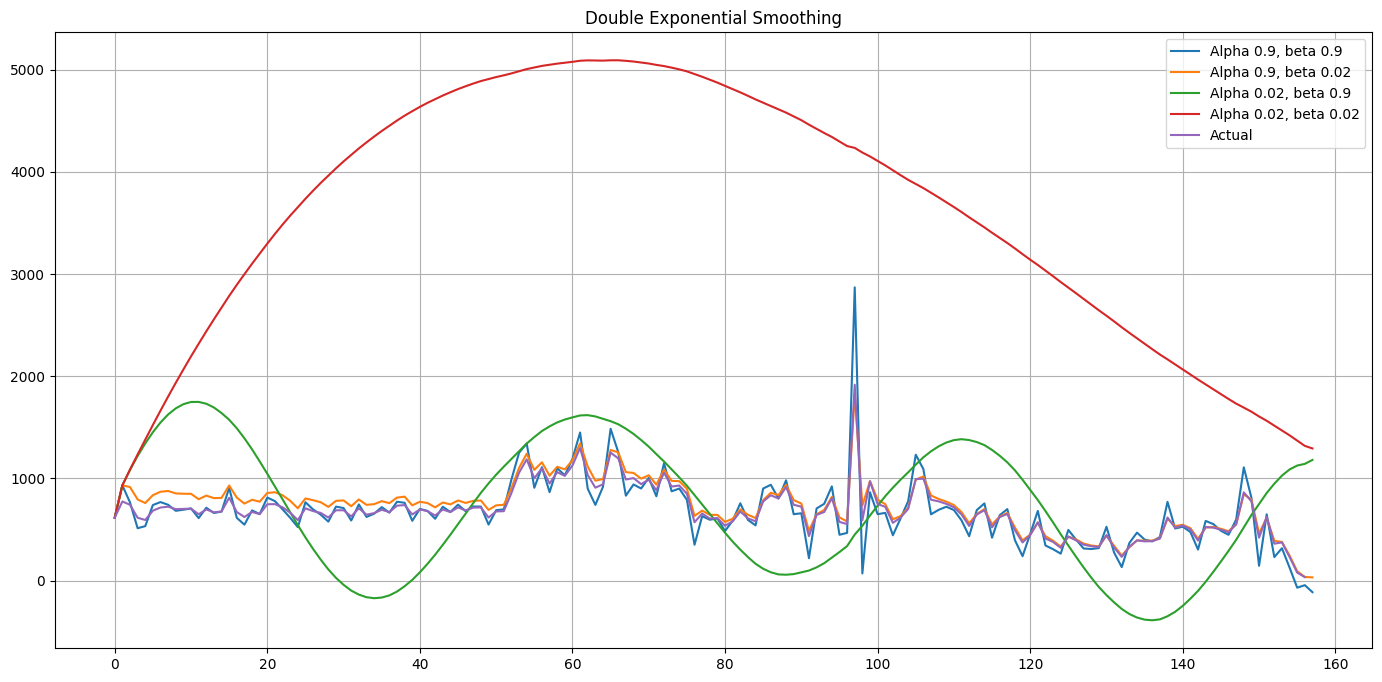

In [24]:
# Double exponential smoothing:
def double_exponential_smoothing(series, alpha, beta):

    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

def plot_double_exponential_smoothing(series, alphas, betas):
     
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)
    
plot_double_exponential_smoothing(grouped_week.Quantity, alphas=[0.9, 0.02], betas=[0.9, 0.02])

Holt’s Winters Seasonal Exponential Smoothing:

In [32]:
y_test

array([433, 395, 353, 337, 330, 446, 325, 233, 332, 395, 385, 387, 412,
       618, 518, 540, 503, 393, 525, 519, 499, 475, 552, 864, 776, 421,
       624, 362, 375, 232,  79,  35])

In [52]:
predictions_

array([ 396.34225981,  312.10892389,  297.89181417,  211.29519571,
        -13.22913067,    1.01724255,  -14.82504921,  -15.76524086,
        -48.1956504 ,  -53.02392886,   19.19930528,  -26.74466291,
        -81.20404125,   38.79309238,    8.39921663,  -32.87639439,
          8.77696748, -116.73435128, -108.03620125, -247.59166176,
       -185.95301639, -166.25480386, -129.05974754, -289.22785912,
       -276.32560822,  338.77376876, -382.70070941, -204.37674594,
       -319.39386132, -331.3941289 , -457.20966537, -397.24353041])

/var/folders/h2/q_r6y6bd5f5c9hvfsfnt31xr0000gn/T/ipykernel_19425/2620156446.py:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = ExponentialSmoothing(y_train ,seasonal_periods=53 ,trend='add', seasonal='add', damped=True).fit()


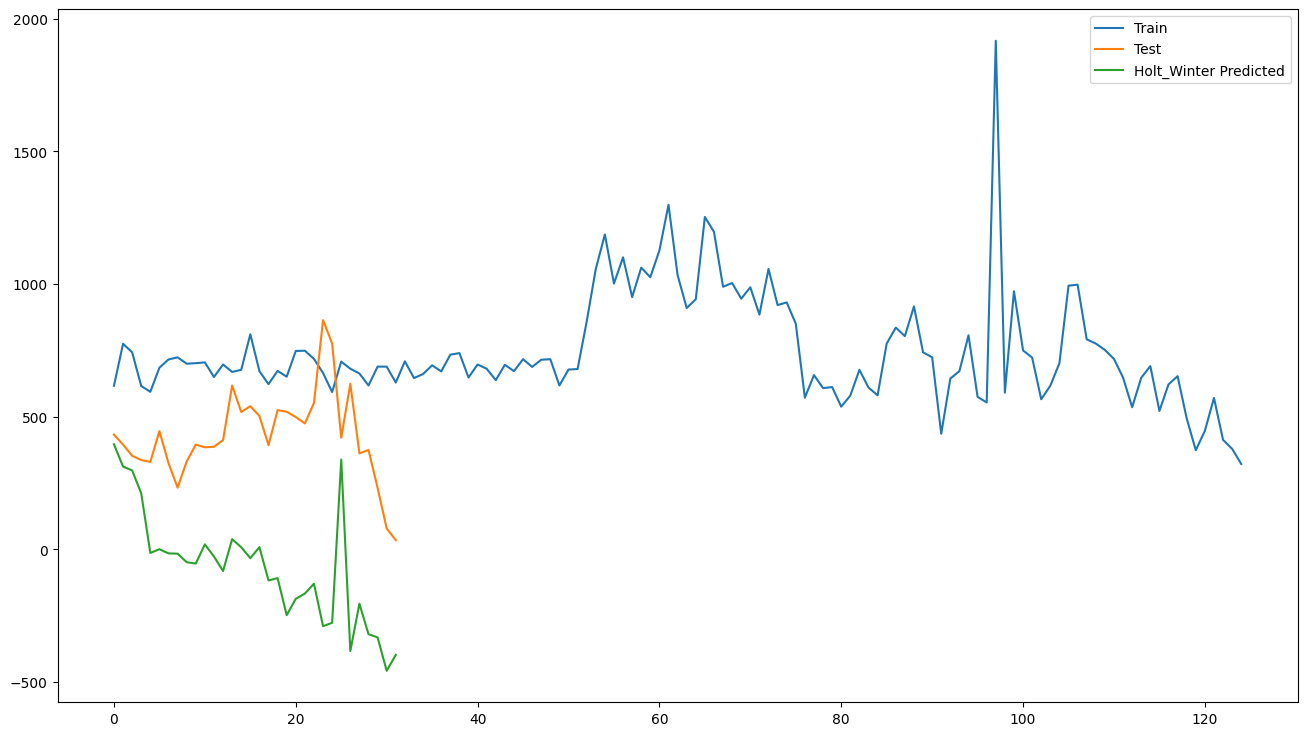

In [31]:
fit1 = ExponentialSmoothing(y_train ,seasonal_periods=53 ,trend='add', seasonal='add', damped=True).fit()
predictions_ = fit1.forecast(len(y_test))
plt.figure(figsize=(16,9))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(predictions_ , label='Holt_Winter Predicted')
plt.legend(loc='best')
plt.show()

#############################################################################################

In [5]:
sorted_combined_df = pd.read_csv('/Users/tszeyenthen/Python Study/jupyter notebbok/WQD7007/sorted_combined_sep_cart_df.csv')

In [6]:
sorted_combined_df = sorted_combined_df.rename(columns={'订单号': 'Order Number',
                                          '订单状态': 'Order Status',
                                          '下单时间': 'Order Date',
                                          '商品信息': 'Product Information',
                                          '买家名称': 'Buyer Name',
                                          '收货国家': 'Shipping Country',
                                          '买家选择物流': "Shipping Method",
                                          '数量': 'Quantity',
                                          '颜色': 'Color',
                                          '型号': 'Size'})

sorted_combined_df['Order Date'] = pd.to_datetime(sorted_combined_df['Order Date'])


sorted_combined_df.columns
sorted_combined_df

,Unnamed: 0,Order Number,Order Status,Order Date,Product Information,Buyer Name,Shipping Country,Shipping Method,Quantity,Color,Size
0,12930,8131154430968489,交易完成,2020-01-01,Cushion Cover Velvet Decor Pillows For Sofa Li...,Mirella Angel,Brazil,Aliexpress Direct\n,1,as picture,45x45cm
1,7506,5009127913653108,交易完成,2020-01-01,Nordic Cushion Cover Black Pillow Cover For Li...,ukokru.,Russian Federation,AliExpress Saver Shipping\n,1,As picture,45x45cm
2,10047,8129040594221349,交易完成,2020-01-01,Super Soft Cushion Cover Velvet Pillow Cover F...,jbedecarratz user,Chile,AliExpress Saver Shipping\nAliExpress Standard...,2,as picture,40x40cm
3,17036,8134317518536175,交易完成,2020-01-01,Plush Cushion Cover Geometric Pillow Cover for...,CK Tsang,Canada,Cainiao Super Economy Global\nChina Post Regis...,1,As Picture,45x45cm
4,20675,8137313424228073,交易完成,2020-01-01,Linen Pilllow Cover With Tassels Soft Cushion ...,Xuanjiao Zhu,Germany,AliExpress Standard Shipping\n,1,as picture,45x45cm
...,...,...,...,...,...,...,...,...,...,...,...
74840,49877,3020454919494912,订单关闭,2022-12-31,Nordic Velvet Cushion Cover Geometric Pillow C...,CELINE CASTAGNET,France,AliExpress Saver Shipping\n,1,As Picture,45x45cm
74841,49876,3020454919494912,订单关闭,2022-12-31,Nordic Velvet Cushion Cover Geometric Pillow C...,CELINE CASTAGNET,France,AliExpress Saver Shipping\n,1,As Picture,45x45cm
74842,49875,3020454919494912,订单关闭,2022-12-31,Nordic Velvet Cushion Cover Geometric Pillow C...,CELINE CASTAGNET,France,AliExpress Saver Shipping\n,1,As Picture,45x45cm
74843,49897,3020411800431028,等待买家收货,2022-12-31,Plush Pillow Cover Cozy Faux Fur Cushion Cover...,יובל אסייג,Israel,AliExpress Standard Shipping\n,4,as picture,45x45cm


In [7]:
sorted_combined_df = sorted_combined_df.drop(columns=['Unnamed: 0'])

sorted_combined_df

,Order Number,Order Status,Order Date,Product Information,Buyer Name,Shipping Country,Shipping Method,Quantity,Color,Size
0,8131154430968489,交易完成,2020-01-01,Cushion Cover Velvet Decor Pillows For Sofa Li...,Mirella Angel,Brazil,Aliexpress Direct\n,1,as picture,45x45cm
1,5009127913653108,交易完成,2020-01-01,Nordic Cushion Cover Black Pillow Cover For Li...,ukokru.,Russian Federation,AliExpress Saver Shipping\n,1,As picture,45x45cm
2,8129040594221349,交易完成,2020-01-01,Super Soft Cushion Cover Velvet Pillow Cover F...,jbedecarratz user,Chile,AliExpress Saver Shipping\nAliExpress Standard...,2,as picture,40x40cm
3,8134317518536175,交易完成,2020-01-01,Plush Cushion Cover Geometric Pillow Cover for...,CK Tsang,Canada,Cainiao Super Economy Global\nChina Post Regis...,1,As Picture,45x45cm
4,8137313424228073,交易完成,2020-01-01,Linen Pilllow Cover With Tassels Soft Cushion ...,Xuanjiao Zhu,Germany,AliExpress Standard Shipping\n,1,as picture,45x45cm
...,...,...,...,...,...,...,...,...,...,...
74840,3020454919494912,订单关闭,2022-12-31,Nordic Velvet Cushion Cover Geometric Pillow C...,CELINE CASTAGNET,France,AliExpress Saver Shipping\n,1,As Picture,45x45cm
74841,3020454919494912,订单关闭,2022-12-31,Nordic Velvet Cushion Cover Geometric Pillow C...,CELINE CASTAGNET,France,AliExpress Saver Shipping\n,1,As Picture,45x45cm
74842,3020454919494912,订单关闭,2022-12-31,Nordic Velvet Cushion Cover Geometric Pillow C...,CELINE CASTAGNET,France,AliExpress Saver Shipping\n,1,As Picture,45x45cm
74843,3020411800431028,等待买家收货,2022-12-31,Plush Pillow Cover Cozy Faux Fur Cushion Cover...,יובל אסייג,Israel,AliExpress Standard Shipping\n,4,as picture,45x45cm


In [8]:
sorted_combined_df_2020 = sorted_combined_df.loc[sorted_combined_df['Order Date'].dt.year == 2020]
sorted_combined_df_2021 = sorted_combined_df.loc[sorted_combined_df['Order Date'].dt.year == 2021]
sorted_combined_df_2022 = sorted_combined_df.loc[sorted_combined_df['Order Date'].dt.year == 2022]

sorted_combined_df_2020
sorted_combined_df_2021
sorted_combined_df_2022

,Order Number,Order Status,Order Date,Product Information,Buyer Name,Shipping Country,Shipping Method,Quantity,Color,Size
55485,8144259904204160,交易完成,2022-01-01,Cushion Cover Velvet Decor Pillows For Sofa Li...,efratde10 user,Israel,Cainiao Super Economy Global\n,1,as picture,50x50cm
55486,8144259106748508,交易完成,2022-01-01,Cushion Cover Velvet Decor Pillows For Sofa Li...,5194 user,Spain,AliExpress Saver Shipping\n,1,as picture,45x45cm
55487,8144259106748508,交易完成,2022-01-01,Cushion Cover Velvet Decor Pillows For Sofa Li...,5194 user,Spain,AliExpress Saver Shipping\n,1,as picture,45x45cm
55488,8144259106748508,交易完成,2022-01-01,Cushion Cover Velvet Decor Pillows For Sofa Li...,5194 user,Spain,AliExpress Saver Shipping\n,1,as picture,45x45cm
55489,3015092875356943,交易完成,2022-01-01,Velvet Cushion Cover Super Soft Pillow Cover f...,Edith Vergeot,France,Cainiao Super Economy Global\nAliExpress Stand...,2,as picture,400mm*400mm
...,...,...,...,...,...,...,...,...,...,...
74840,3020454919494912,订单关闭,2022-12-31,Nordic Velvet Cushion Cover Geometric Pillow C...,CELINE CASTAGNET,France,AliExpress Saver Shipping\n,1,As Picture,45x45cm
74841,3020454919494912,订单关闭,2022-12-31,Nordic Velvet Cushion Cover Geometric Pillow C...,CELINE CASTAGNET,France,AliExpress Saver Shipping\n,1,As Picture,45x45cm
74842,3020454919494912,订单关闭,2022-12-31,Nordic Velvet Cushion Cover Geometric Pillow C...,CELINE CASTAGNET,France,AliExpress Saver Shipping\n,1,As Picture,45x45cm
74843,3020411800431028,等待买家收货,2022-12-31,Plush Pillow Cover Cozy Faux Fur Cushion Cover...,יובל אסייג,Israel,AliExpress Standard Shipping\n,4,as picture,45x45cm


In [9]:
completed_transactions_df =sorted_combined_df[sorted_combined_df['Order Status'] == '交易完成']

In [10]:
completed_transactions_df

,Order Number,Order Status,Order Date,Product Information,Buyer Name,Shipping Country,Shipping Method,Quantity,Color,Size
0,8131154430968489,交易完成,2020-01-01,Cushion Cover Velvet Decor Pillows For Sofa Li...,Mirella Angel,Brazil,Aliexpress Direct\n,1,as picture,45x45cm
1,5009127913653108,交易完成,2020-01-01,Nordic Cushion Cover Black Pillow Cover For Li...,ukokru.,Russian Federation,AliExpress Saver Shipping\n,1,As picture,45x45cm
2,8129040594221349,交易完成,2020-01-01,Super Soft Cushion Cover Velvet Pillow Cover F...,jbedecarratz user,Chile,AliExpress Saver Shipping\nAliExpress Standard...,2,as picture,40x40cm
3,8134317518536175,交易完成,2020-01-01,Plush Cushion Cover Geometric Pillow Cover for...,CK Tsang,Canada,Cainiao Super Economy Global\nChina Post Regis...,1,As Picture,45x45cm
4,8137313424228073,交易完成,2020-01-01,Linen Pilllow Cover With Tassels Soft Cushion ...,Xuanjiao Zhu,Germany,AliExpress Standard Shipping\n,1,as picture,45x45cm
...,...,...,...,...,...,...,...,...,...,...
74753,3020529436940688,交易完成,2022-12-29,Plush Pillow Cover Cozy Faux Fur Cushion Cover...,Hasret Karaca,Netherlands,AliExpress Standard Shipping\n,2,as picture,45x45cm
74758,3020424624817858,交易完成,2022-12-29,Super Soft Cushion Cover Velvet Pillow Cover F...,meis elias,Spain,AliExpress Saver Shipping\n,2,as picture,30x50cm
74777,3020285683695849,交易完成,2022-12-30,Plush Pillow Cover Cozy Faux Fur Cushion Cover...,Cruz Claudia,France,AliExpress Standard Shipping\n,2,as picture,45x45cm
74793,3020420218786254,交易完成,2022-12-30,Plush Pillow Cover Cozy Faux Fur Cushion Cover...,Suzanne s,Netherlands,AliExpress Saver Shipping\n,1,as picture,45x45cm


Total Observations in weeks: 157
Training Observations in weeks: 140
Testing Observations in weeks: 13


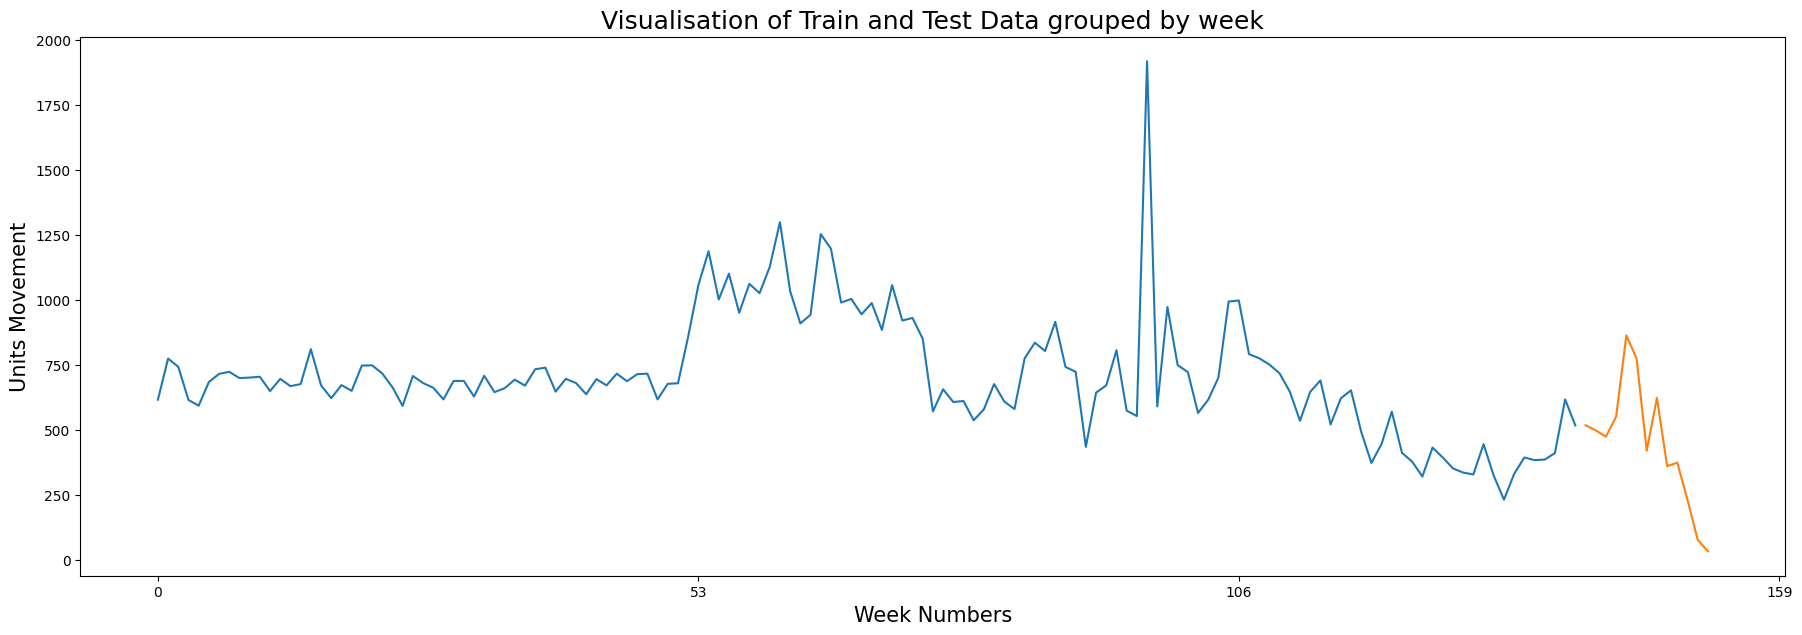

In [73]:
print('Total Observations in weeks: %d' % (len(series)))
print('Training Observations in weeks: %d' % (len(train)))
print('Testing Observations in weeks: %d' % (len(test)))
plt.figure(figsize=(22,7))
plt.title('Visualisation of Train and Test Data grouped by week',  size=18)

# Creating custom tick for x-axis week number :
tick_spacing = 53
x_ticks = np.arange(0, 448,tick_spacing)
plt.xticks(x_ticks)

#plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel("Week Numbers",  size=15)
plt.ylabel("Units Movement",  size=15)
plt.plot(train, label = 'train')

plt.plot([None for i in train] + [x for x in test], label = 'test')
plt.show()

/var/folders/h2/q_r6y6bd5f5c9hvfsfnt31xr0000gn/T/ipykernel_19425/828647587.py:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = ExponentialSmoothing(train ,seasonal_periods=53 ,trend='add', seasonal='add', damped=True).fit()


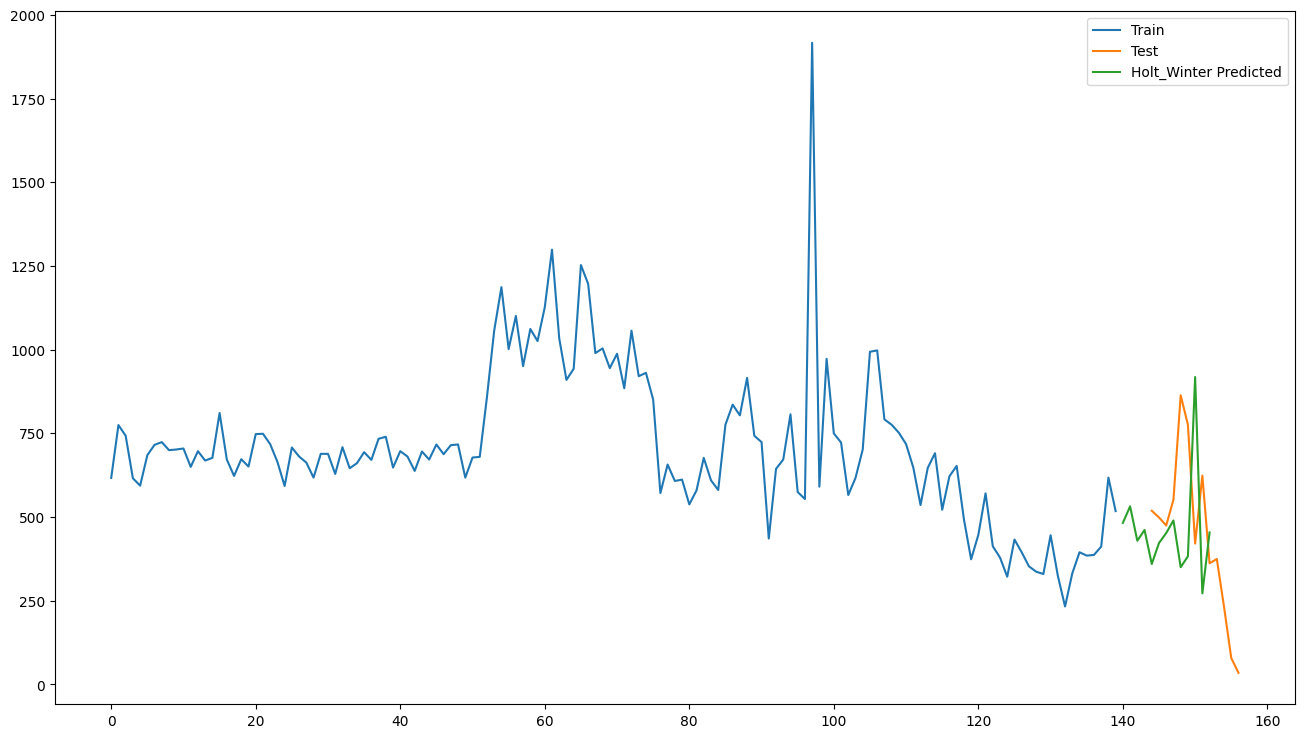

In [75]:
fit1 = ExponentialSmoothing(train ,seasonal_periods=53 ,trend='add', seasonal='add', damped=True).fit()
predictions_ = fit1.forecast(len(test))
plt.figure(figsize=(16,9))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(predictions_ , label='Holt_Winter Predicted')
plt.legend(loc='best')
plt.show()

In [76]:
# Evaluation using MAPE : 
mape = np.mean(np.abs(predictions_ - test)/np.abs(test))*100  # MAPE
mape

41.3429187010647

Using Cross Validation to find the best hyperparameter for TES :

In [77]:
class HoltWinters:
    """Scikit-learn like interface for Holt-Winters method."""

    def __init__(self, season_len=53, alpha=0.5, beta=0.5, gamma=0.5):
        self.beta = beta
        self.alpha = alpha
        self.gamma = gamma
        self.season_len = season_len

    def fit(self, series):
        # note that unlike scikit-learn's fit method, it doesn't learn
        # the optimal model paramters, alpha, beta, gamma instead it takes
        # whatever the value the user specified the produces the predicted time
        # series, this of course can be changed.
        beta = self.beta
        alpha = self.alpha
        gamma = self.gamma
       # damped = self.damped
        season_len = self.season_len
        seasonals = self._initial_seasonal(series)

        # initial values
        predictions = []
        smooth = series[0]
        trend = self._initial_trend(series)
        predictions.append(smooth)

        for i in range(1, len(series)):
            value = series[i]
            previous_smooth = smooth
            seasonal = seasonals[i % season_len]
            smooth = alpha * (value - seasonal) + (1 - alpha) * (previous_smooth + trend)
            trend = beta * (smooth - previous_smooth) + (1 - beta) * trend
            seasonals[i % season_len] = gamma * (value - smooth) + (1 - gamma) * seasonal
            predictions.append(smooth + trend + seasonals[i % season_len])

        self.trend_ = trend
        self.smooth_ = smooth
        self.seasonals_ = seasonals
        self.predictions_ = predictions
        return self
    
    def _initial_trend(self, series):
        season_len = self.season_len
        total = 0.0
        for i in range(season_len):
            total += (series[i + season_len] - series[i]) / season_len

        trend = total / season_len
        return trend

    def _initial_seasonal(self, series):
        season_len = self.season_len
        n_seasons = len(series) // season_len

        season_averages = np.zeros(n_seasons)
        for j in range(n_seasons):
            start_index = season_len * j
            end_index = start_index + season_len
            season_average = np.sum(series[start_index:end_index]) / season_len
            season_averages[j] = season_average

        seasonals = np.zeros(season_len)
        seasons = np.arange(n_seasons)
        index = seasons * season_len
        for i in range(season_len):
            seasonal = np.sum(series[index + i] - season_averages) / n_seasons
            seasonals[i] = seasonal
            return seasonals

    
    def predict(self, n_preds=13):
        """
        Parameters
        ----------
        n_preds: int, default 13
            Predictions horizon. e.g. If the original input time series to the .fit
            method has a length of 50, then specifying n_preds = 13, will generate
            predictions for the next 13 steps. Resulting in a prediction length of 63.
        """
        predictions = self.predictions_
        original_series_len = len(predictions)
        for i in range(original_series_len, original_series_len + n_preds):
            m = i - original_series_len + 1
            prediction = self.smooth_ + m * self.trend_ + self.seasonals_[i % self.season_len]
            predictions.append(prediction)

        return predictions

In [110]:
# Cross Validation to minimise the error :
def timeseries_cv_score(params, series, loss_function, season_len=53):
    """
    Iterating over training set,
    forecast and calculate error test set.
    """
    errors = []    
    alpha, beta, gamma = params

    model = HoltWinters(season_len, alpha, beta, gamma)
    model.fit(train)

    # evaluate the prediction on the test set only
    
    # We are predicting for the full data set - train, test and 5 weeks(1 week) which were asked to keep aside 
    predictions = model.predict(n_preds=len(test)+5)
    
    test_predictions = predictions[-len(test):]
    test_actual = test
    error = loss_function(test_actual, test_predictions)
    errors.append(error)
    
    return np.mean(errors)


In [83]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

In [109]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error


# provide initial values for model parameters' alpha, beta and gamma:

x = [0, 0, 0]
test_size = 13

# passing the train data only for the scipy optimization :
data = series.values[:-int(test_size+5)]
opt = minimize(timeseries_cv_score, x0=x, 
               args=(data, mean_squared_error), 
               method='TNC', bounds=((0, 1), (0, 1), (0, 1)))

print('original parameters: {}'.format(str(x)))
print('best parameters: {}'.format(str(opt.x)))

original parameters: [0, 0, 0]
best parameters: [0.00788057 0.13737978 0.19007995]


In [108]:
# retrieve optimal values, train the finnal model with them
# Now, adding the best parameter found :
season_len=53

alpha_final, beta_final, gamma_final = opt.x

model = HoltWinters(season_len, alpha_final, beta_final, gamma_final)
model.fit(train)
#predictions = model.predict(len(test))

# evaluate the prediction on the test set only
predictions = model.predict(n_preds=len(test)+5)

test_predictions = predictions[-len(test):]
test_actual = test

print('original series length: ', len(series))
print('full prediction length: ', len(predictions))
print('train length: ', len(train))
print('Test prediction length: ', len(test_predictions))

original series length:  157
full prediction length:  158
train length:  140
Test prediction length:  13


Holt’s Winters Seasonal Exponential Smoothing Model evaluation using MAPE :

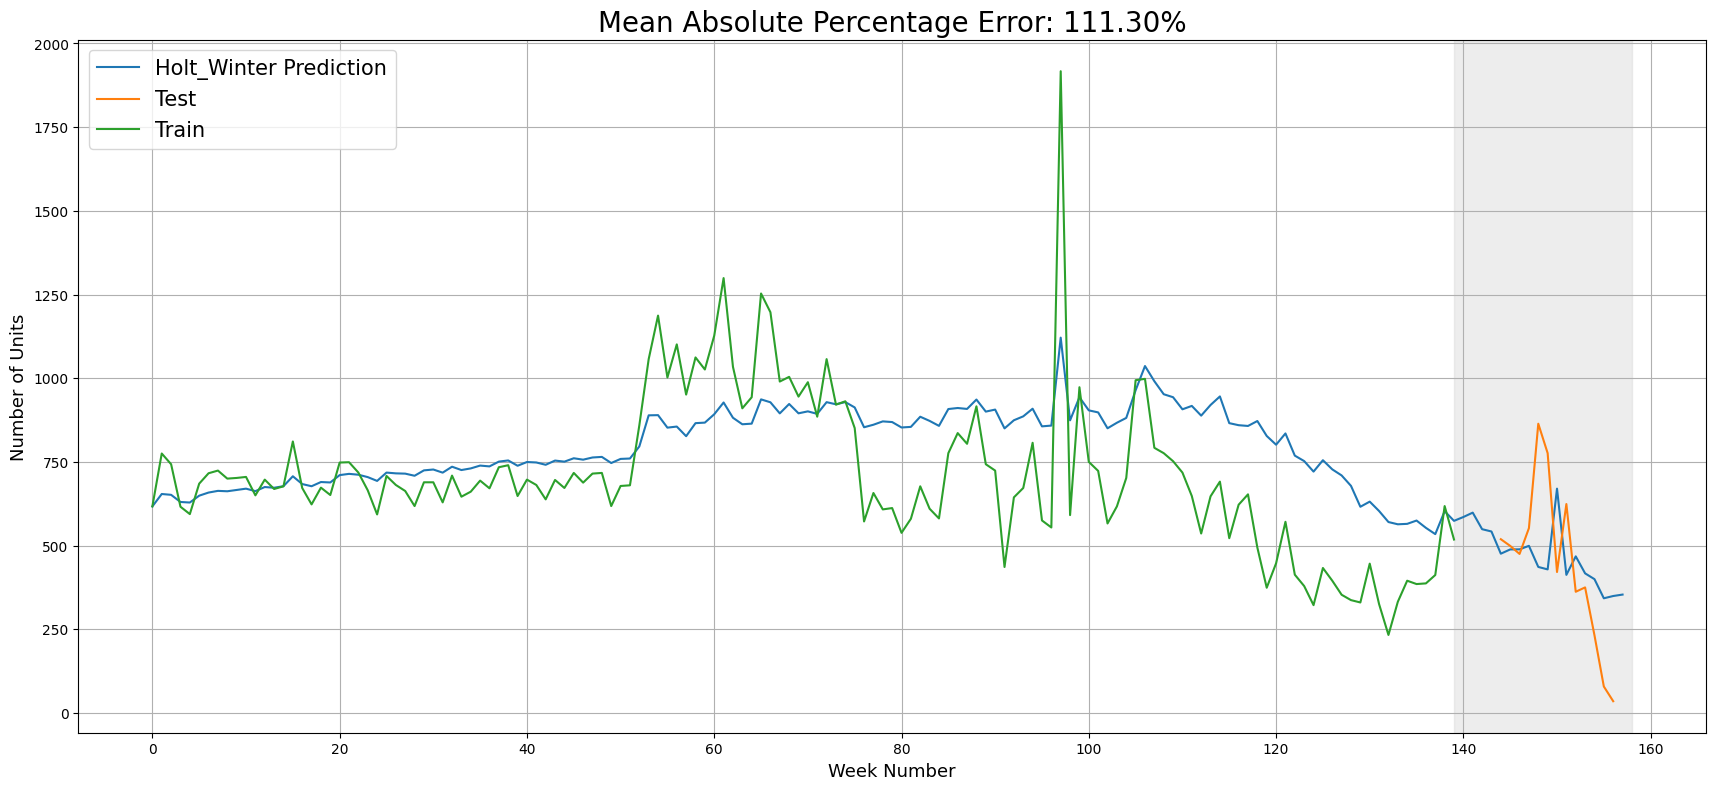

In [111]:
# MAPE calculation :
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Evaluating the model only on test data :
test_data = test
error = mean_absolute_percentage_error(test_data, test_predictions)

plt.figure(figsize=(21, 9))
plt.plot(predictions, label='Holt_Winter Prediction')
plt.plot(test_data, label='Test')
plt.plot(train.values, label='Train')
plt.title('Mean Absolute Percentage Error: {0:.2f}%'.format(error),fontsize=20)
plt.xlabel("Week Number",fontsize=13)
plt.ylabel("Number of Units",fontsize=13)
plt.axvspan(len(series) - int(len(test)+5), len(predictions), alpha=0.4, color='lightgrey')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='best', fontsize=15)
plt.show()

In [112]:
# Preparing the data frame for submission :

#Comparing the predicted values with the actual values:
index = np.arange(13)
exp_compare = pd.DataFrame(columns = ['Actual', 'Predicted'], index = index)
for i in range(len(test)):
    exp_compare['Actual'][i] = test.iloc[i]
   # exp_compare['Predicted'][i] = round((test_predictions.iloc[i]),0)
    exp_compare['Predicted'] = test_predictions

# Forcing panda to use the non-scientific notation :
exp_compare['Predicted'] = exp_compare['Predicted'].astype('int64')    
print(exp_compare)

   Actual  Predicted
0     519        488
1     499        488
2     475        499
3     552        436
4     864        428
5     776        670
6     421        412
7     624        467
8     362        416
9     375        399
10    232        342
11     79        349
12     35        353


/var/folders/h2/q_r6y6bd5f5c9hvfsfnt31xr0000gn/T/ipykernel_19425/32698561.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_compare['Actual'][i] = test.iloc[i]
/var/folders/h2/q_r6y6bd5f5c9hvfsfnt31xr0000gn/T/ipykernel_19425/32698561.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_compare['Actual'][i] = test.iloc[i]
/var/folders/h2/q_r6y6bd5f5c9hvfsfnt31xr0000gn/T/ipykernel_19425/32698561.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [113]:
# create copy of data frame :
exp_compare_save = exp_compare

# Create list of the index from test data :
index_list = test.index.values.tolist()

# Change the index to denote week numbers:
exp_compare_save.index = index_list
exp_compare_save

,Actual,Predicted
144,519,488
145,499,488
146,475,499
147,552,436
148,864,428
149,776,670
150,421,412
151,624,467
152,362,416
153,375,399


Time series forecasting with SARIMA:

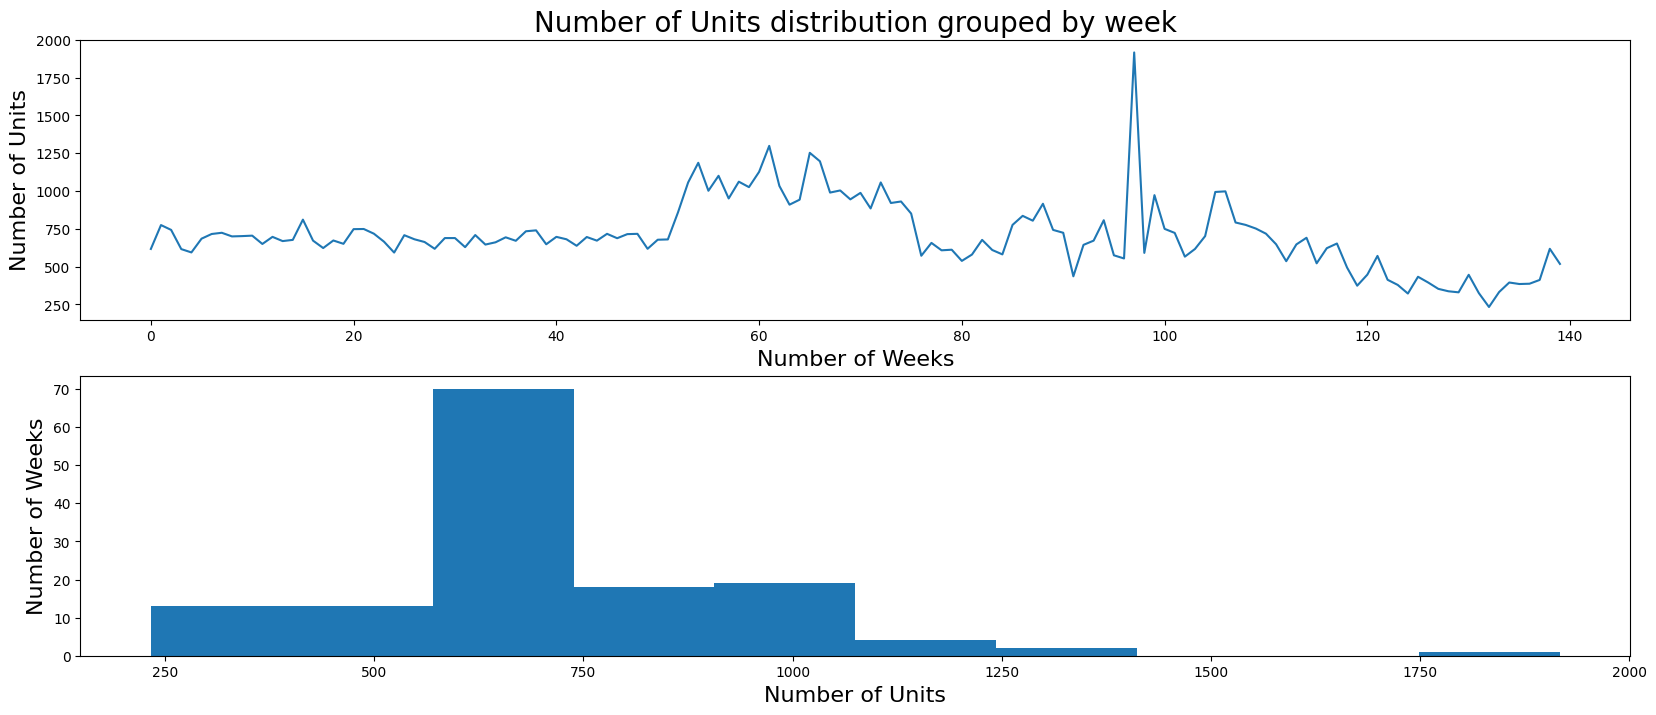

In [114]:
plt.figure(figsize=(20, 8))

plt.figure(1)
# line plot
plt.subplot(211)
plt.title('Number of Units distribution grouped by week',fontsize=20)
plt.ylabel('Number of Units',fontsize=16)
plt.xlabel('Number of Weeks',fontsize=16)
plt.plot(train)
# histogram
plt.subplot(212)
plt.hist(train)
plt.xlabel('Number of Units',fontsize=16)
plt.ylabel('Number of Weeks',fontsize=16)
plt.show()

In [116]:
import itertools
from itertools import combinations

# Define the p, d and q parameters to take any value between 0 and 4: 
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# itertools.product()
# This tool computes the cartesian product of input iterables.

# Generate all different combinations of seasonal p, d and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 53) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 53)
SARIMAX: (0, 0, 1) x (0, 1, 0, 53)
SARIMAX: (0, 1, 0) x (0, 1, 1, 53)
SARIMAX: (0, 1, 0) x (1, 0, 0, 53)


In [117]:
#iteration over all the combinations of (p,d,q)

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}53 - AIC:{} - BIC:{}'.format(param, param_seasonal, round(results.aic,4), round(results.bic,4)))
        except:
            continue

In [120]:
import statsmodels.api as sm

# by using best P D Q values for order and seasonal order, building the final forecast model
arima_model_train = sm.tsa.statespace.SARIMAX(train,
                                             order=(0, 1, 1),
                                             seasonal_order= (1, 1, 1, 53),
                                              enforce_stationarity= False,
                                         enforce_invertibility=False)
results_arima_train= arima_model_train.fit()

print(results_arima_train.summary())

/Users/tszeyenthen/Python Study/venv-sereinsetupjupyter/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.45372D+00    |proj g|=  1.05260D-01

At iterate    5    f=  1.41887D+00    |proj g|=  1.89943D-03

At iterate   10    f=  1.41850D+00    |proj g|=  9.75979D-04

At iterate   15    f=  1.41466D+00    |proj g|=  2.92090D-02

At iterate   20    f=  1.33519D+00    |proj g|=  1.42550D-03

At iterate   25    f=  1.33518D+00    |proj g|=  1.11692D-04

At iterate   30    f=  1.33517D+00    |proj g|=  5.66896D-04

At iterate   35    f=  1.33517D+00    |proj g|=  1.31375D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

In [121]:
# plotting the predicted diagnostics
results_arima_train.plot_diagnostics(figsize=(15,8))
plt.show()

ValueError: Length of endogenous variable must be larger the the number of lags used in the model and the number of observations burned in the log-likelihood calculation.

<Figure size 1500x800 with 0 Axes>

In [ ]:
# Predicted values based on ARIMA model:

# Train data prediction 
pred_arima_train = results_arima_train.get_prediction(dynamic=False)
pred_arima_train_ci = pred_arima_train.conf_int()

nforecast = 12
# Test Data Prediction :
pred_arima_test = results_arima_train.get_prediction(start=434,end=434 + nforecast, dynamic=False)
pred_arima_test_ci = pred_arima_test.conf_int()

In [ ]:
#Plotting the predicted and actual data together

plt.figure(figsize = (20,9))

tick_spacing = 53
x_ticks = np.arange(0, 448,tick_spacing)
plt.xticks(x_ticks)

plot1 = train.plot(label='Observed')
pred_arima_train.predicted_mean.plot(ax=plot1, label='Predicted (ARIMA)')

plt.title("Actual V/s Predicted Weekly Time series for Train Data ", size = 22)
plt.xlabel('Weeks', size = 18)
plt.ylabel('Total Units Movement', size = 18)
plt.legend(loc = 'best')
plt.show()